/var/folders/vl/tld4y4295dvbpfhgzk8mrvkc0000gn/T/ipykernel_87881/1353648978.py:44: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = np.mean(estimate_sigma(noisy_image, multichannel=True))


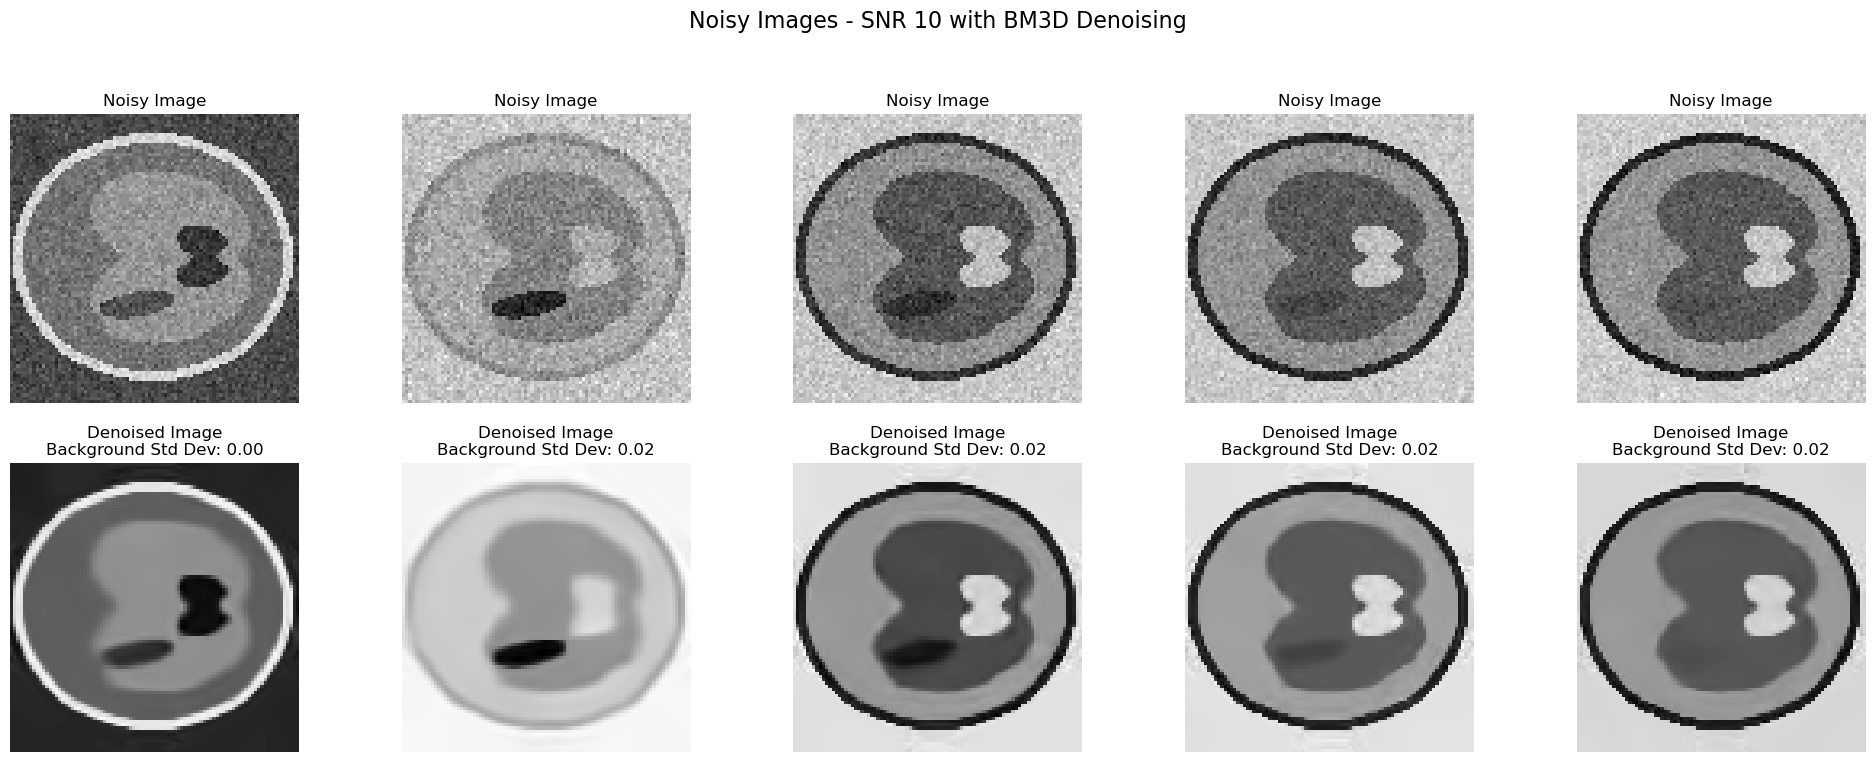

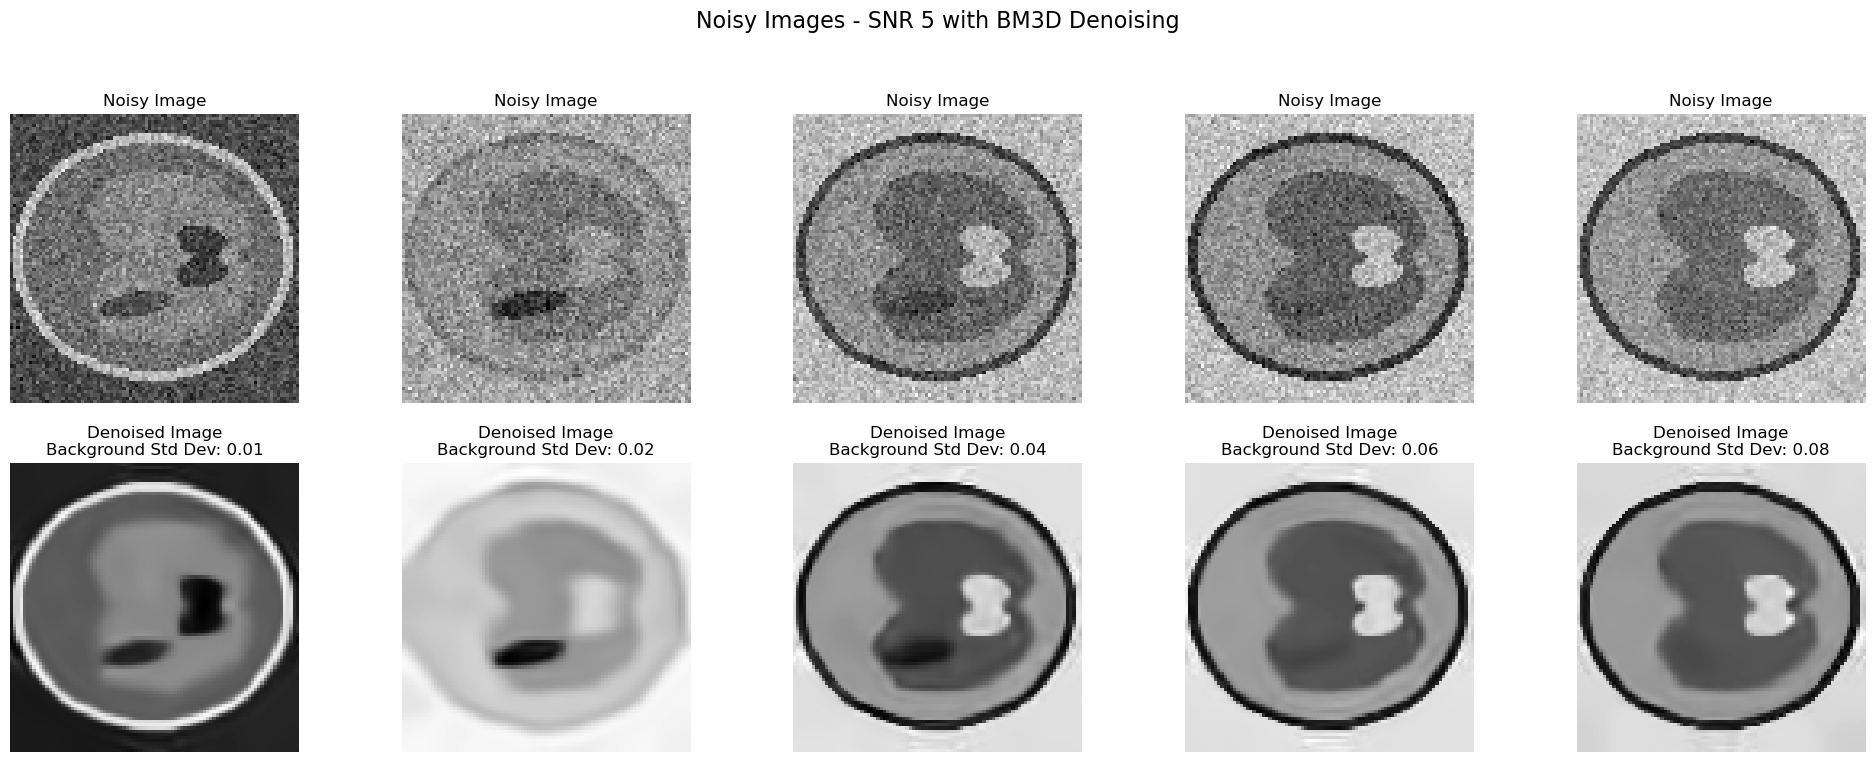

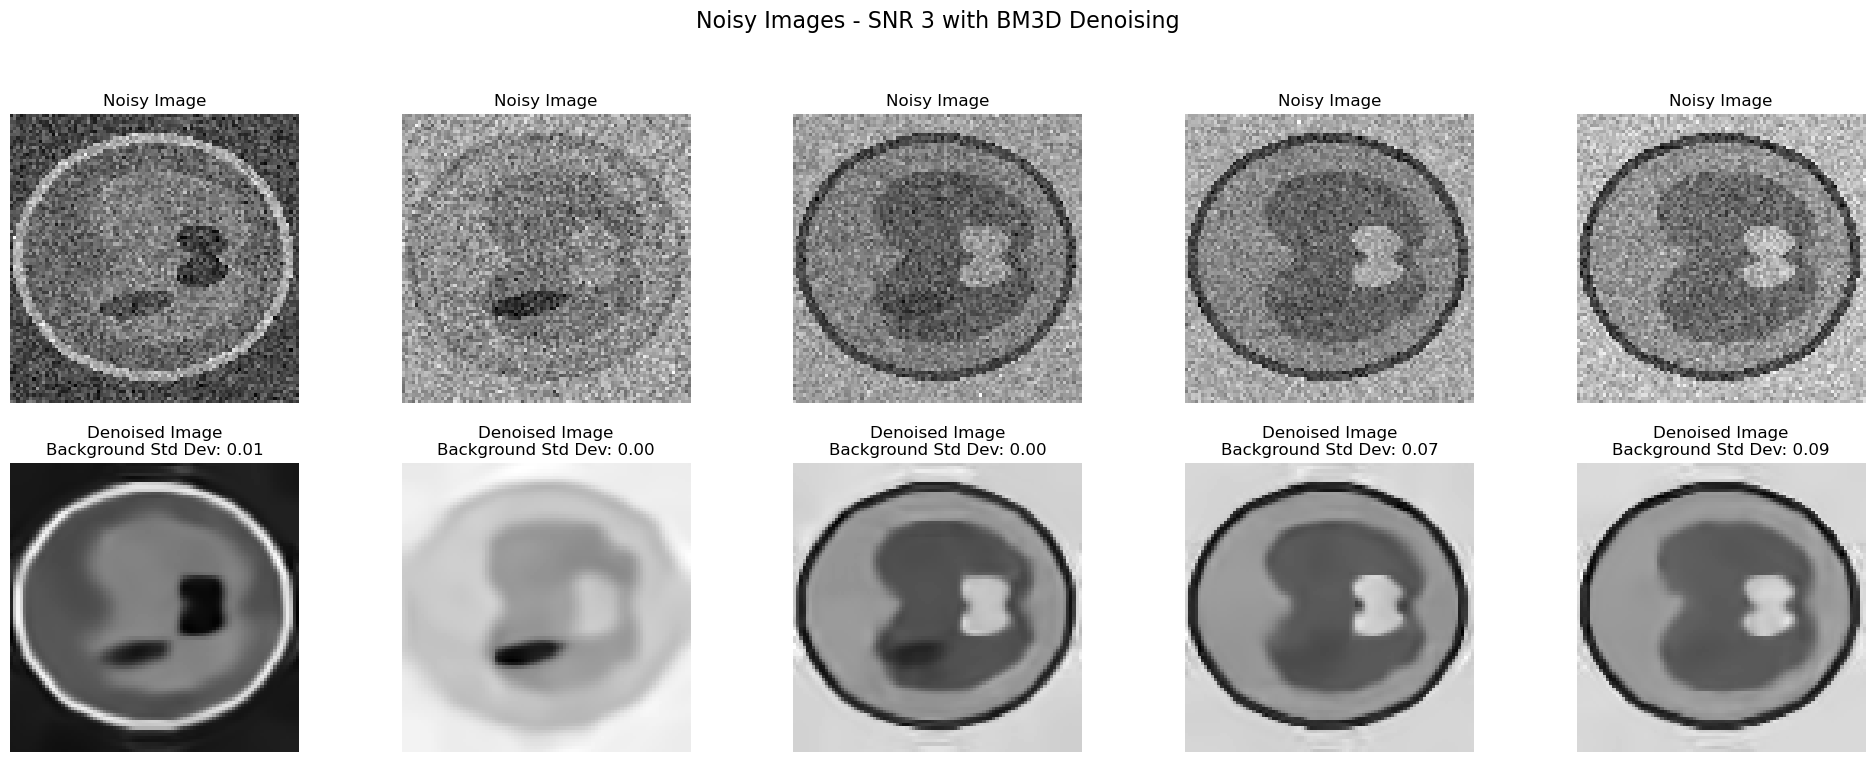

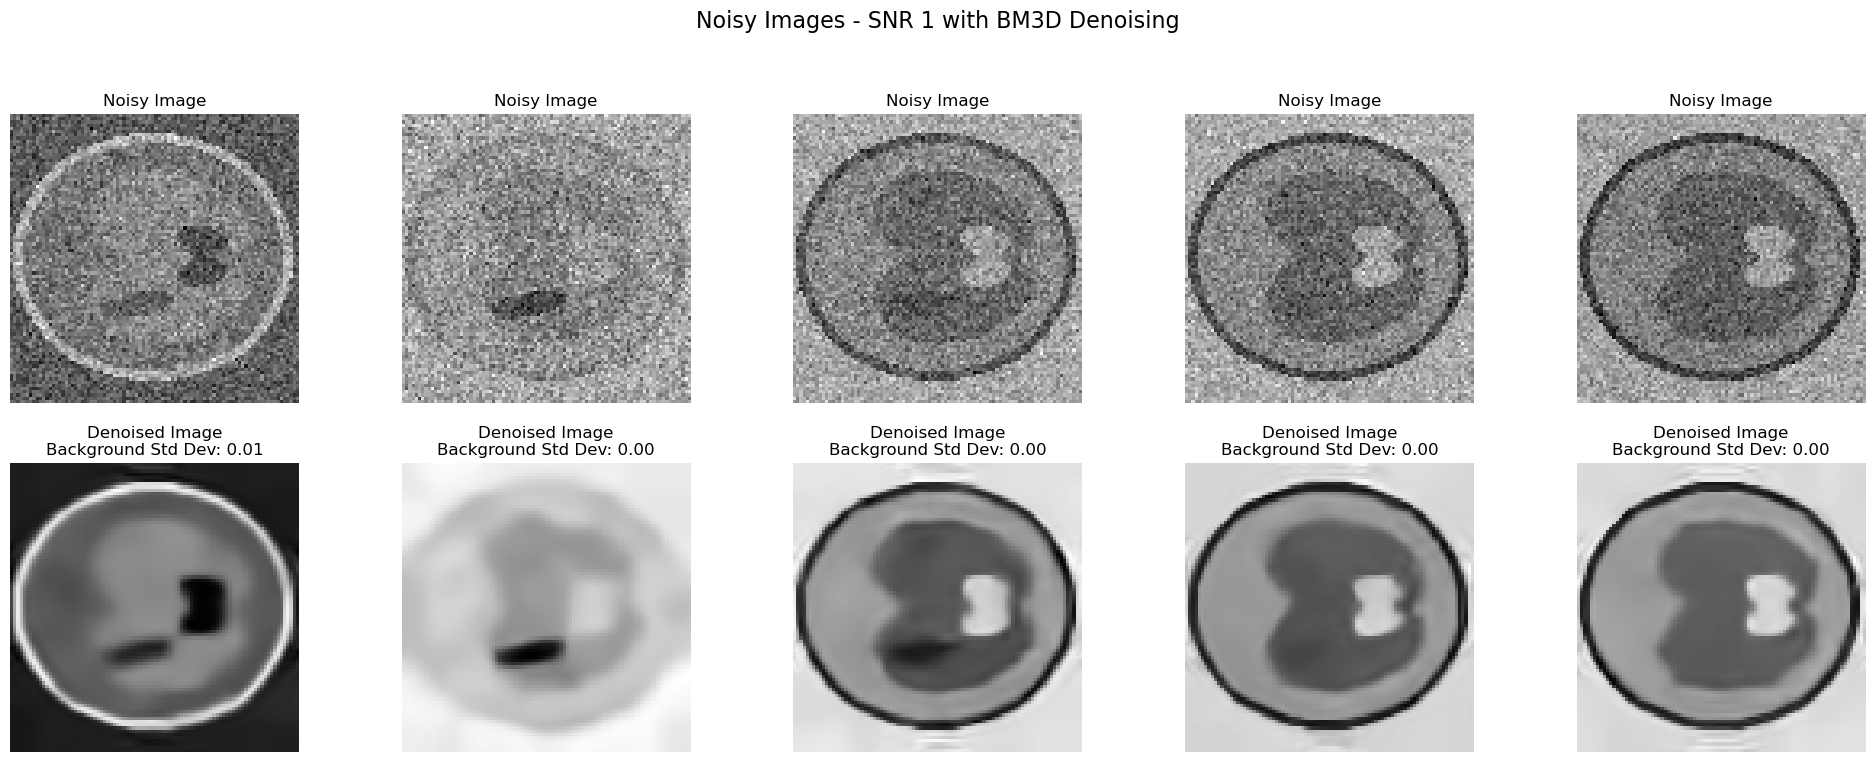

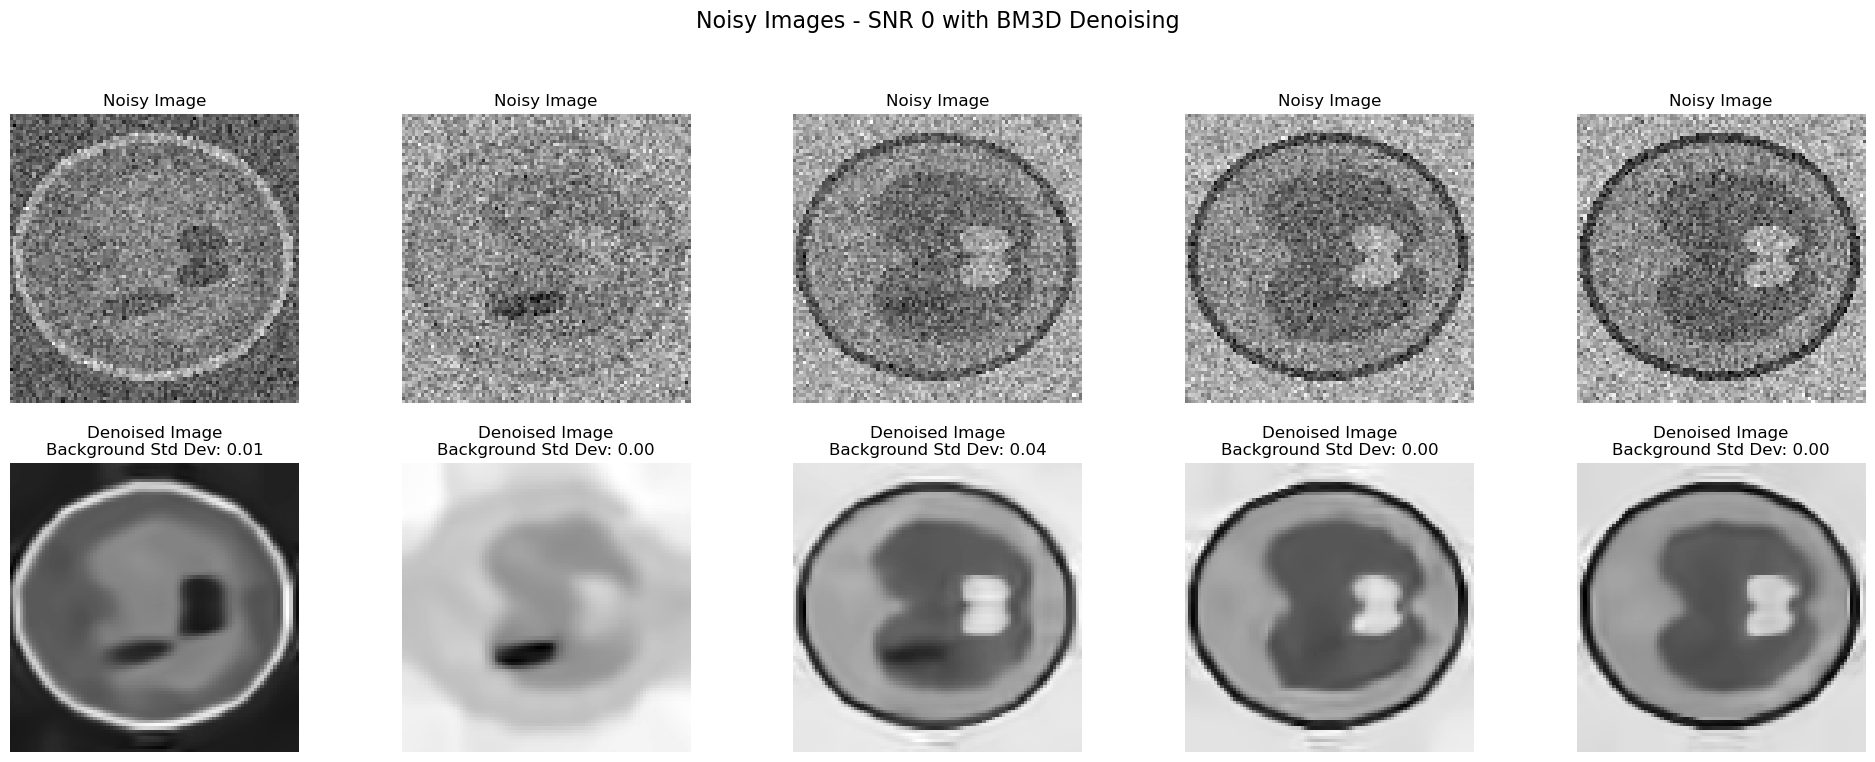

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import estimate_sigma
from skimage.color import rgb2gray  # For converting RGB images to grayscale if needed
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
import scipy.io
import bm3d

def create_background_mask(image_gray):
    thresh = threshold_otsu(image_gray)
    binary_image = image_gray <= thresh
    cleared_image = clear_border(binary_image)
    label_image = label(cleared_image)
    regions = regionprops(label_image)
    largest_area = 0
    background_label = 0
    for region in regions:
        if region.area > largest_area:
            largest_area = region.area
            background_label = region.label
    background_mask = label_image == background_label
    return background_mask

snrs = [10, 5, 3, 1, 0]

for snr in snrs:
    mat = scipy.io.loadmat(f'/Users/dolorious/Downloads/simulation-1/GroundTruth_gaussian_SNR{snr}.mat')
    
    noisy_image_data = mat['data_gaussian']
    plt.figure(figsize=(20, 8))

    conditions = noisy_image_data.shape[2]
    for j in range(conditions):
        noisy_image = noisy_image_data[:, :, j]

        # Convert to grayscale if it's a multichannel image
        if noisy_image.ndim == 3 and noisy_image.shape[2] == 3:
            noisy_image_gray = rgb2gray(noisy_image)
        else:
            noisy_image_gray = noisy_image

        sigma_est = np.mean(estimate_sigma(noisy_image, multichannel=True))
        background_mask = create_background_mask(noisy_image_gray)

        # Apply BM3D Denoising
        denoised_image = bm3d.bm3d(noisy_image_gray, sigma_psd=sigma_est)

        # Calculate standard deviation of the background in the noisy image
        std_deviation_noisy = np.std(noisy_image_gray[background_mask])
        # For denoised image, let's also calculate it for comparison
        std_deviation_denoised = np.std(denoised_image[background_mask])

        plt.subplot(2, conditions, j + 1)
        plt.imshow(noisy_image_gray if noisy_image_gray.ndim == 2 else noisy_image, cmap='gray')
        plt.title('Noisy Image')
        plt.axis('off')

        plt.subplot(2, conditions, j + conditions + 1)
        plt.imshow(denoised_image, cmap='gray')
        plt.title(f'Denoised Image\nBackground Std Dev: {std_deviation_denoised:.2f}')
        plt.axis('off')

    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.85)
    plt.suptitle(f'Noisy Images - SNR {snr} with BM3D Denoising', fontsize=16, y=0.98)
    plt.show()



In [ ]:
denoised_image = bm3d.bm3d(image_noisy, sigma_psd=30/255, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import estimate_sigma
from skimage.color import rgb2gray  # For converting RGB images to grayscale if needed
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
import scipy.io
import bm3d

def create_background_mask(image_gray):
    thresh = threshold_otsu(image_gray)
    binary_image = image_gray <= thresh
    cleared_image = clear_border(binary_image)
    label_image = label(cleared_image)
    regions = regionprops(label_image)
    largest_area = 0
    background_label = 0
    for region in regions:
        if region.area > largest_area:
            largest_area = region.area
            background_label = region.label
    background_mask = label_image == background_label
    return background_mask

snrs = [10, 5, 3, 1, 0]

for snr in snrs:
    mat = scipy.io.loadmat(f'/Users/dolorious/Downloads/simulation-1/GroundTruth_gaussian_SNR{snr}.mat')
    
    noisy_image_data = mat['data_gaussian']
    plt.figure(figsize=(20, 8))

    conditions = noisy_image_data.shape[2]
    for j in range(conditions):
        noisy_image = noisy_image_data[:, :, j]

        # Convert to grayscale if it's a multichannel image
        if noisy_image.ndim == 3 and noisy_image.shape[2] == 3:
            noisy_image_gray = rgb2gray(noisy_image)
        else:
            noisy_image_gray = noisy_image

        sigma_est = np.mean(estimate_sigma(noisy_image, multichannel=True))
        background_mask = create_background_mask(noisy_image_gray)

        # Apply BM3D Denoising
        denoised_image = bm3d.bm3d(noisy_image_gray, sigma_psd=sigma_est)

        # Calculate standard deviation of the background in the noisy image
        std_deviation_noisy = np.std(noisy_image_gray[background_mask])
        # For denoised image, let's also calculate it for comparison
        std_deviation_denoised = np.std(denoised_image[background_mask])

        plt.subplot(2, conditions, j + 1)
        plt.imshow(noisy_image_gray if noisy_image_gray.ndim == 2 else noisy_image, cmap='gray')
        plt.title('Noisy Image')
        plt.axis('off')

        plt.subplot(2, conditions, j + conditions + 1)
        plt.imshow(denoised_image, cmap='gray')
        plt.title(f'Denoised Image\nBackground Std Dev: {std_deviation_denoised:.2f}')
        plt.axis('off')

    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.85)
    plt.suptitle(f'Noisy Images - SNR {snr} with BM3D Denoising', fontsize=16, y=0.98)
    plt.show()



/var/folders/vl/tld4y4295dvbpfhgzk8mrvkc0000gn/T/ipykernel_87881/1629658188.py:44: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = np.mean(estimate_sigma(noisy_image, multichannel=True))


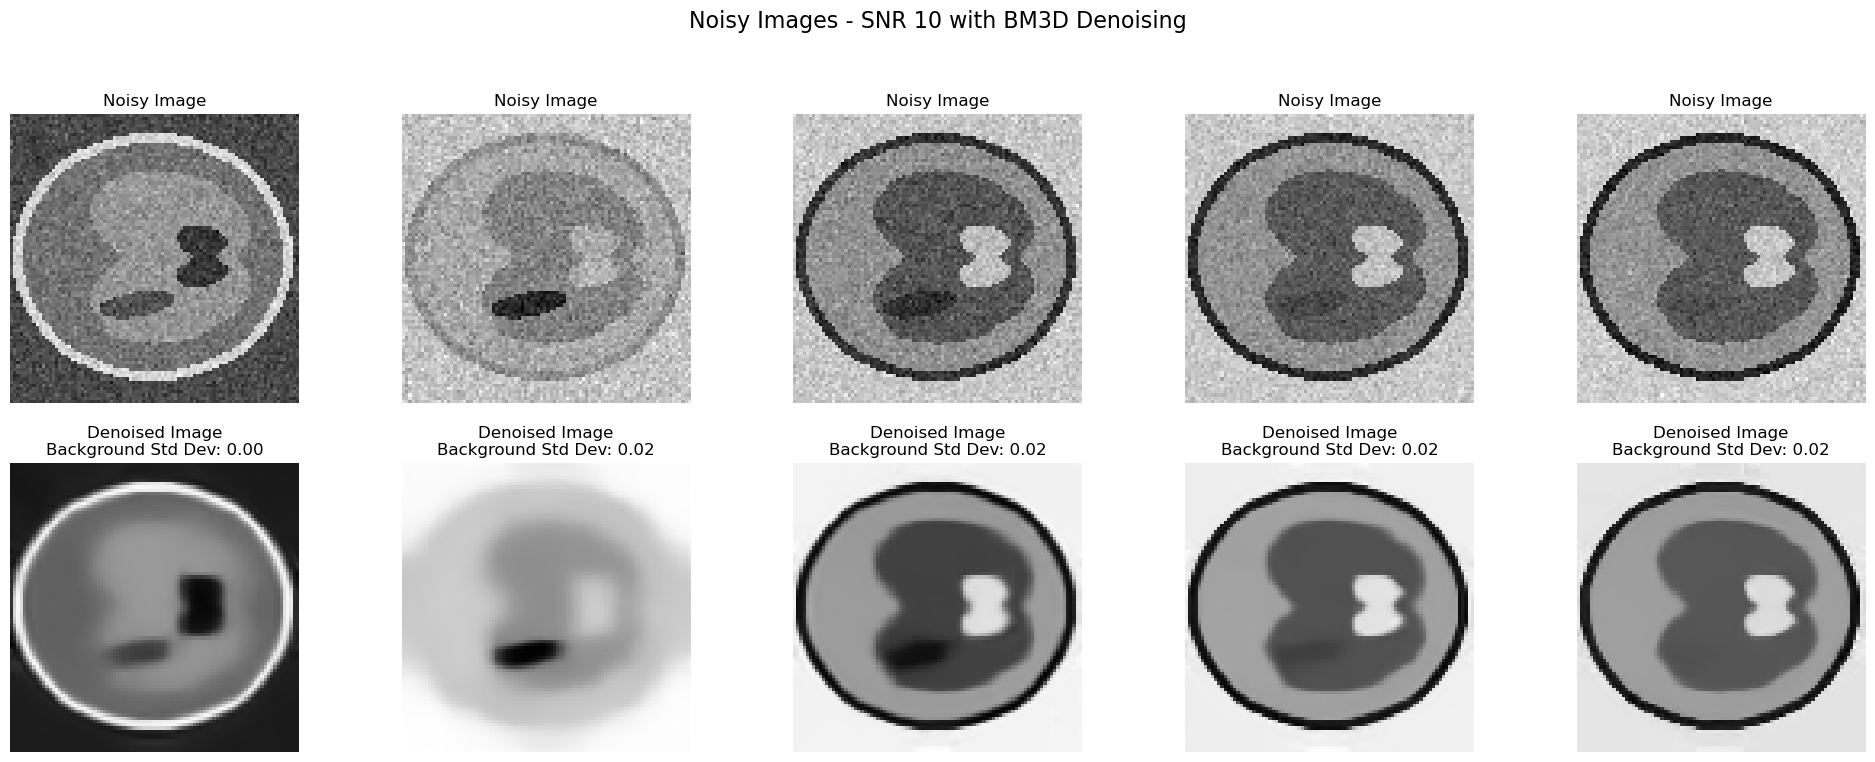

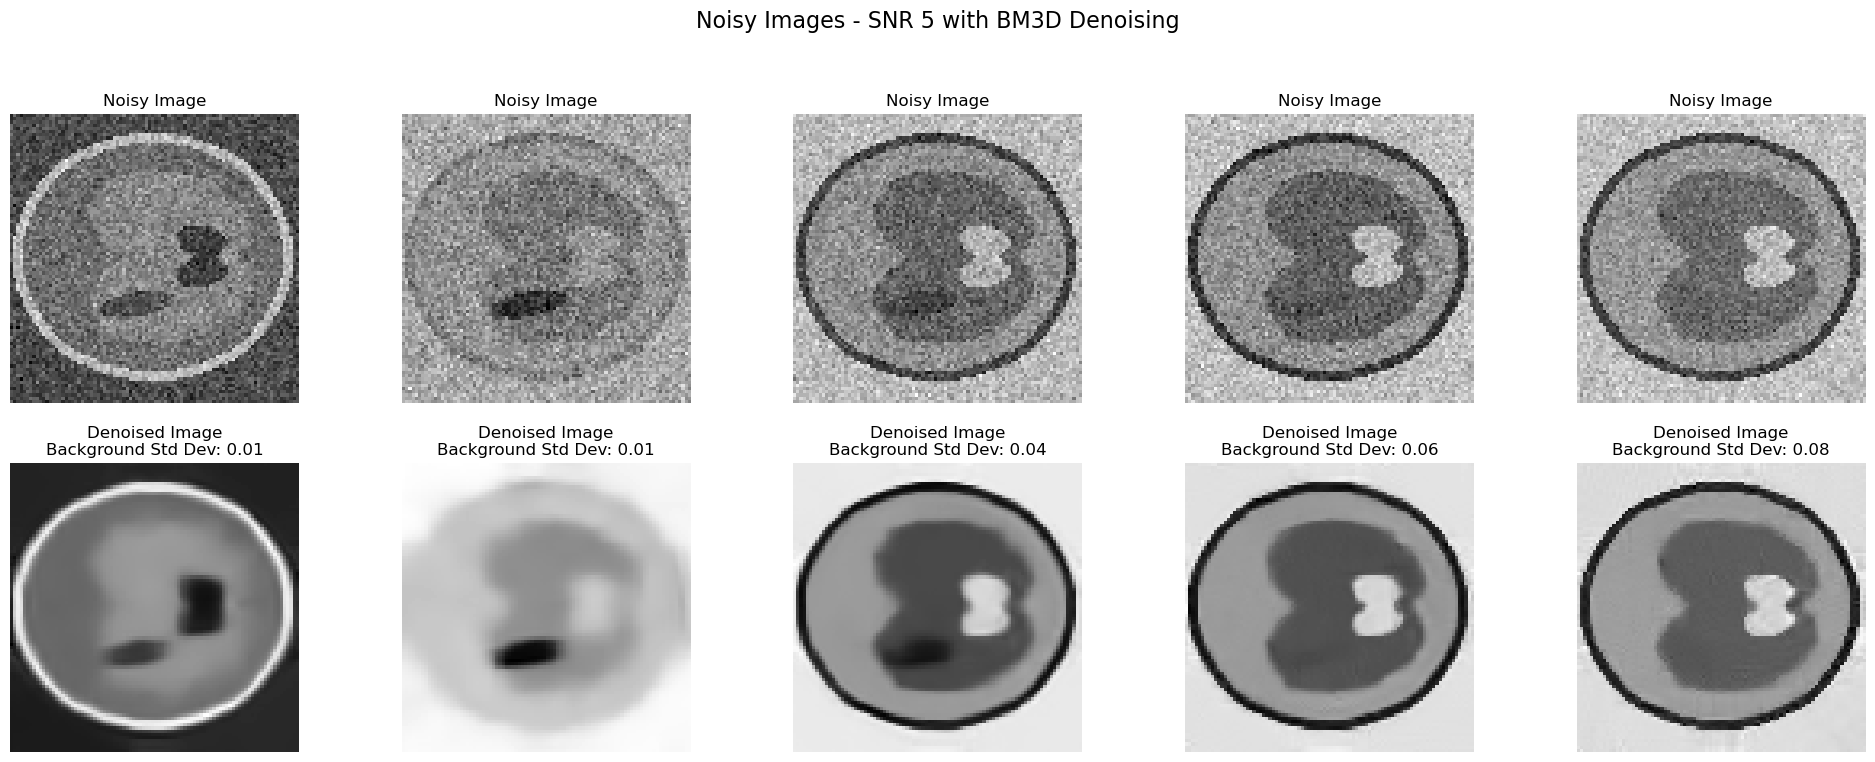

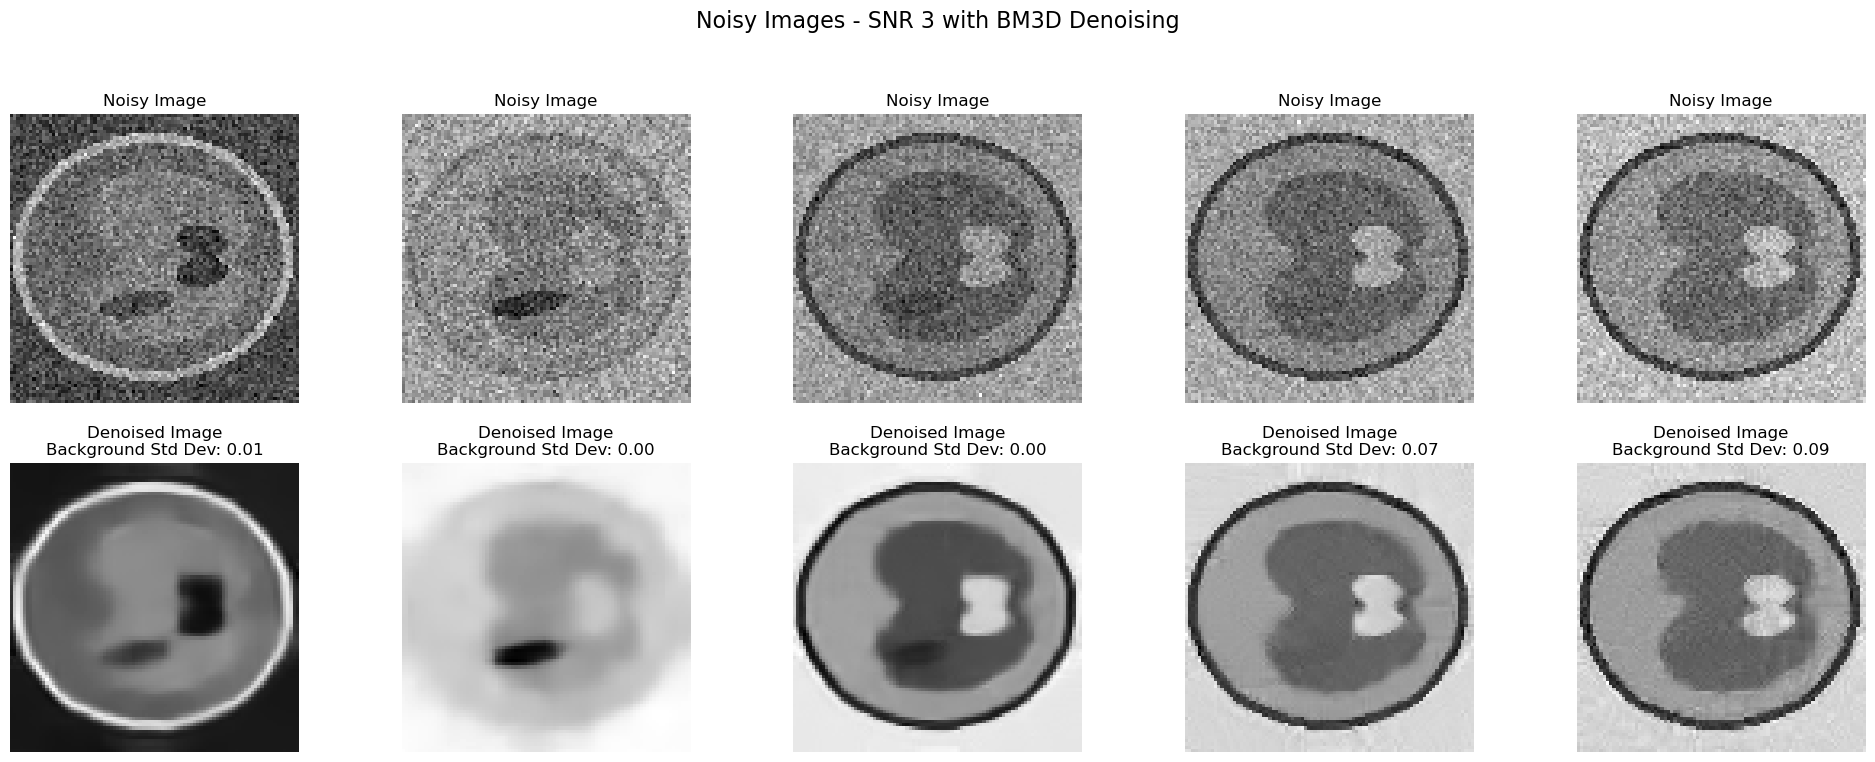

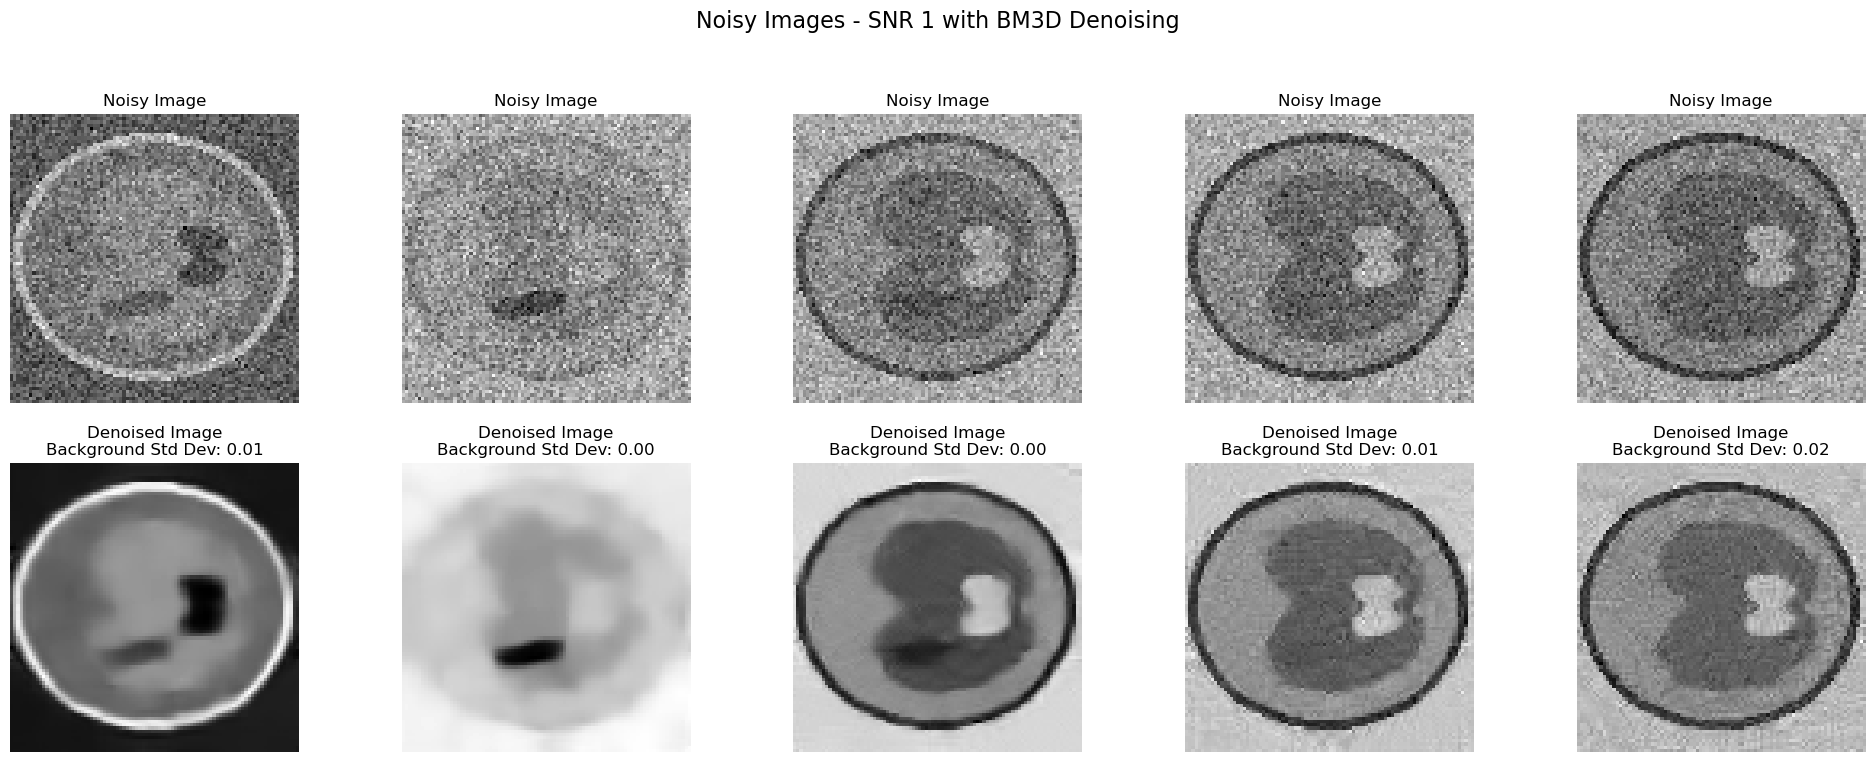

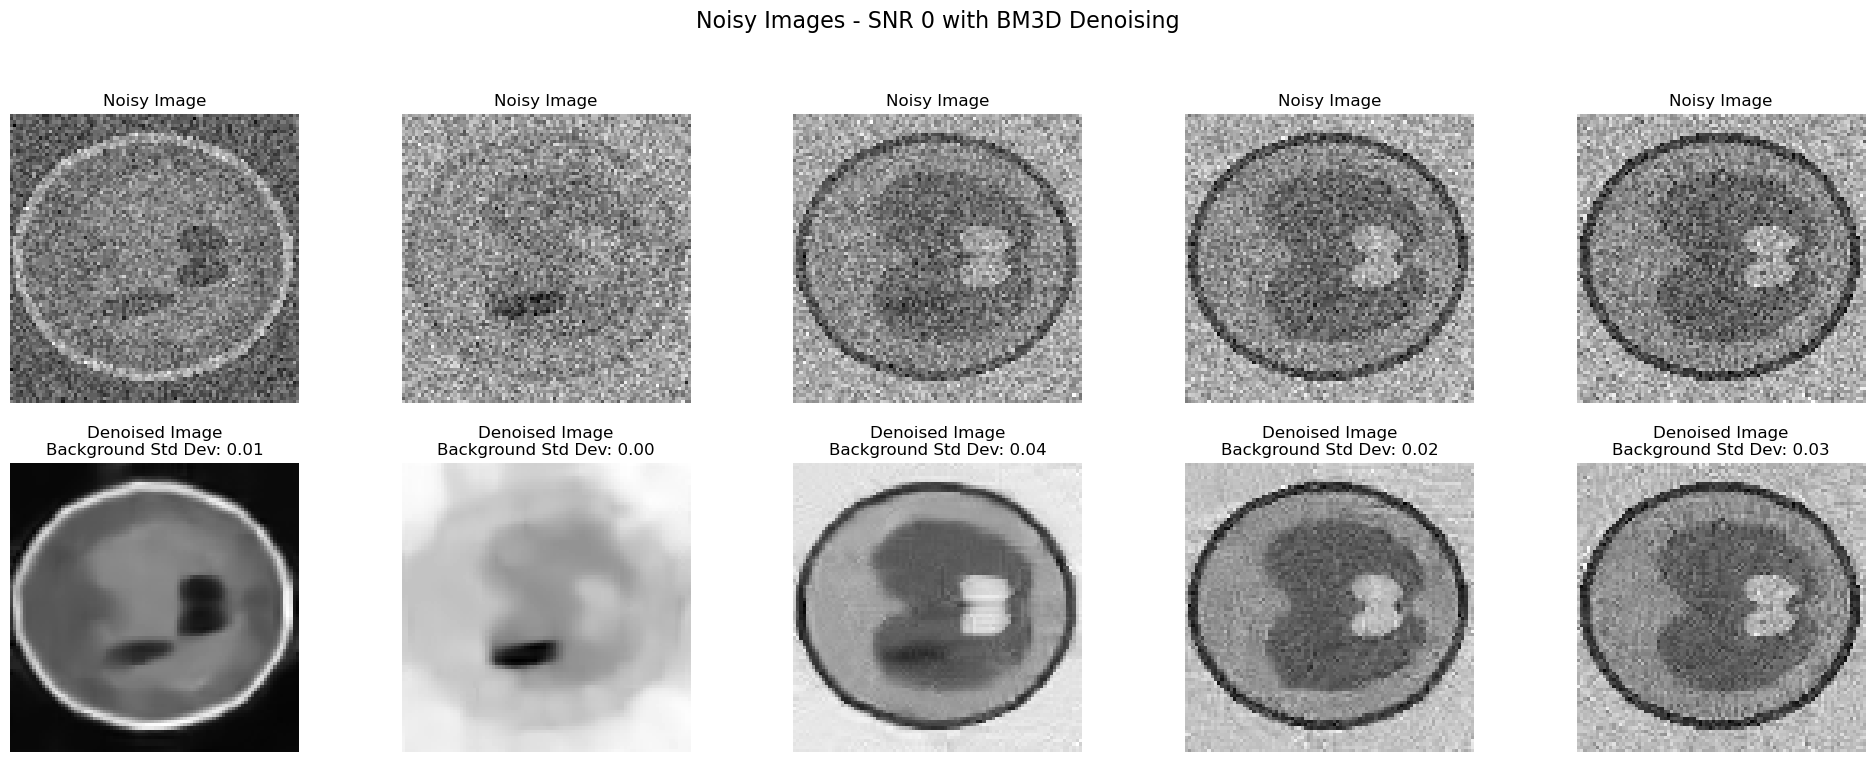

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import estimate_sigma
from skimage.color import rgb2gray  # For converting RGB images to grayscale if needed
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
import scipy.io
import bm3d

def create_background_mask(image_gray):
    thresh = threshold_otsu(image_gray)
    binary_image = image_gray <= thresh
    cleared_image = clear_border(binary_image)
    label_image = label(cleared_image)
    regions = regionprops(label_image)
    largest_area = 0
    background_label = 0
    for region in regions:
        if region.area > largest_area:
            largest_area = region.area
            background_label = region.label
    background_mask = label_image == background_label
    return background_mask

snrs = [10, 5, 3, 1, 0]

for snr in snrs:
    mat = scipy.io.loadmat(f'/Users/dolorious/Downloads/simulation-1/GroundTruth_gaussian_SNR{snr}.mat')
    
    noisy_image_data = mat['data_gaussian']
    plt.figure(figsize=(20, 8))

    conditions = noisy_image_data.shape[2]
    for j in range(conditions):
        noisy_image = noisy_image_data[:, :, j]

        # Convert to grayscale if it's a multichannel image
        if noisy_image.ndim == 3 and noisy_image.shape[2] == 3:
            noisy_image_gray = rgb2gray(noisy_image)
        else:
            noisy_image_gray = noisy_image

        sigma_est = np.mean(estimate_sigma(noisy_image, multichannel=True))
        background_mask = create_background_mask(noisy_image_gray)

        # Apply BM3D Denoising
        denoised_image = bm3d.bm3d(noisy_image_gray, sigma_psd=15/255, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

        # Calculate standard deviation of the background in the noisy image
        std_deviation_noisy = np.std(noisy_image_gray[background_mask])
        # For denoised image, let's also calculate it for comparison
        std_deviation_denoised = np.std(denoised_image[background_mask])

        plt.subplot(2, conditions, j + 1)
        plt.imshow(noisy_image_gray if noisy_image_gray.ndim == 2 else noisy_image, cmap='gray')
        plt.title('Noisy Image')
        plt.axis('off')

        plt.subplot(2, conditions, j + conditions + 1)
        plt.imshow(denoised_image, cmap='gray')
        plt.title(f'Denoised Image\nBackground Std Dev: {std_deviation_denoised:.2f}')
        plt.axis('off')

    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.85)
    plt.suptitle(f'Noisy Images - SNR {snr} with BM3D Denoising', fontsize=16, y=0.98)
    plt.show()



/var/folders/vl/tld4y4295dvbpfhgzk8mrvkc0000gn/T/ipykernel_87881/157599859.py:44: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = np.mean(estimate_sigma(noisy_image, multichannel=True))


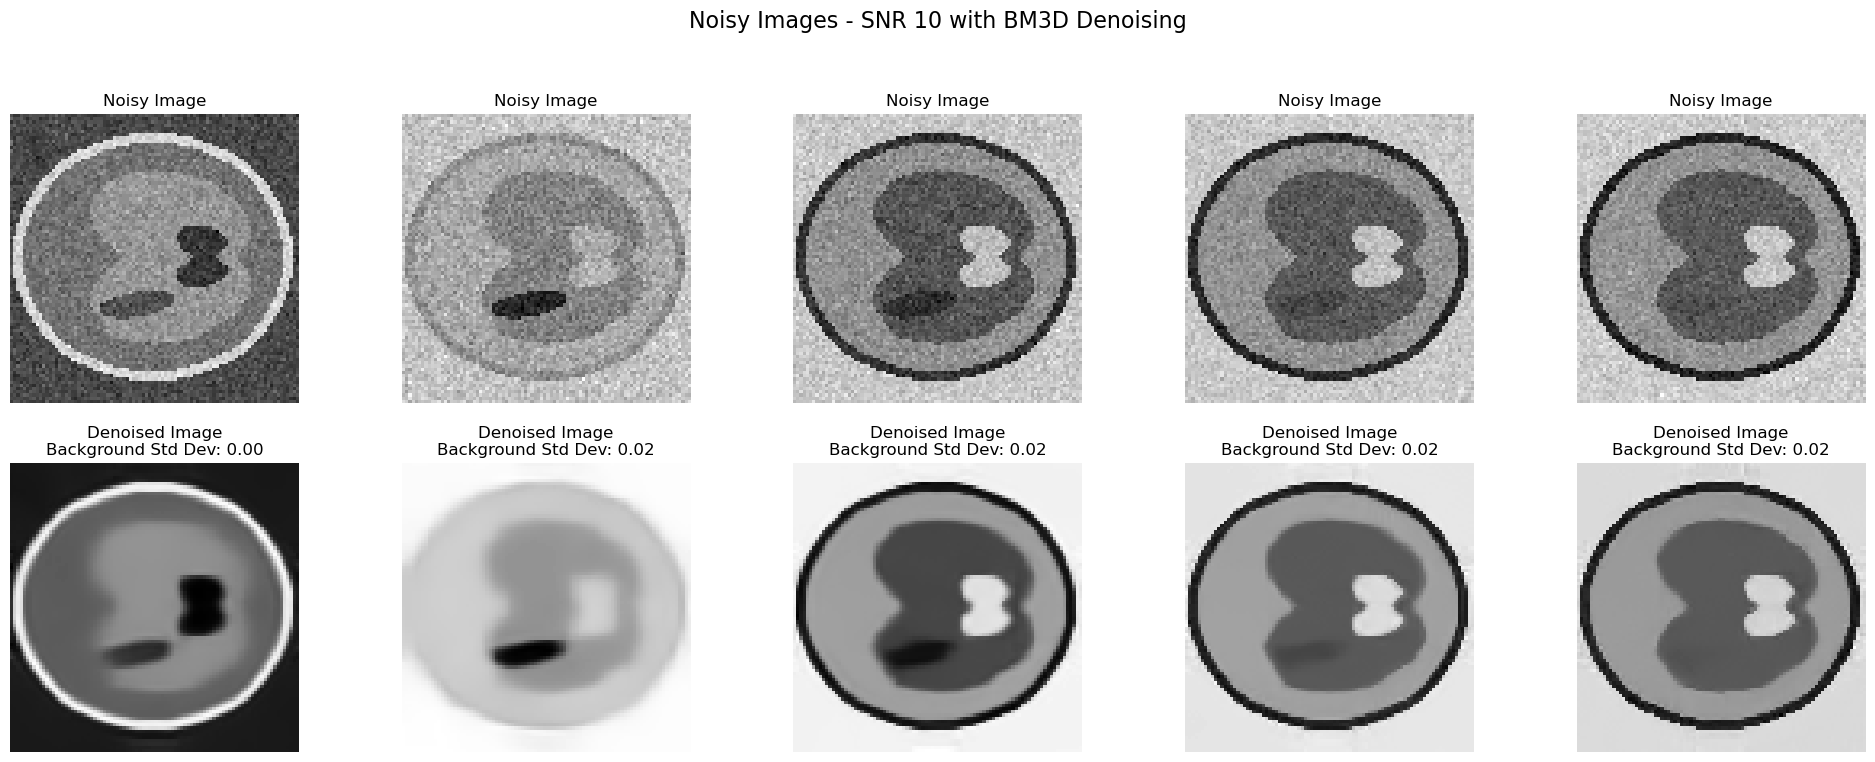

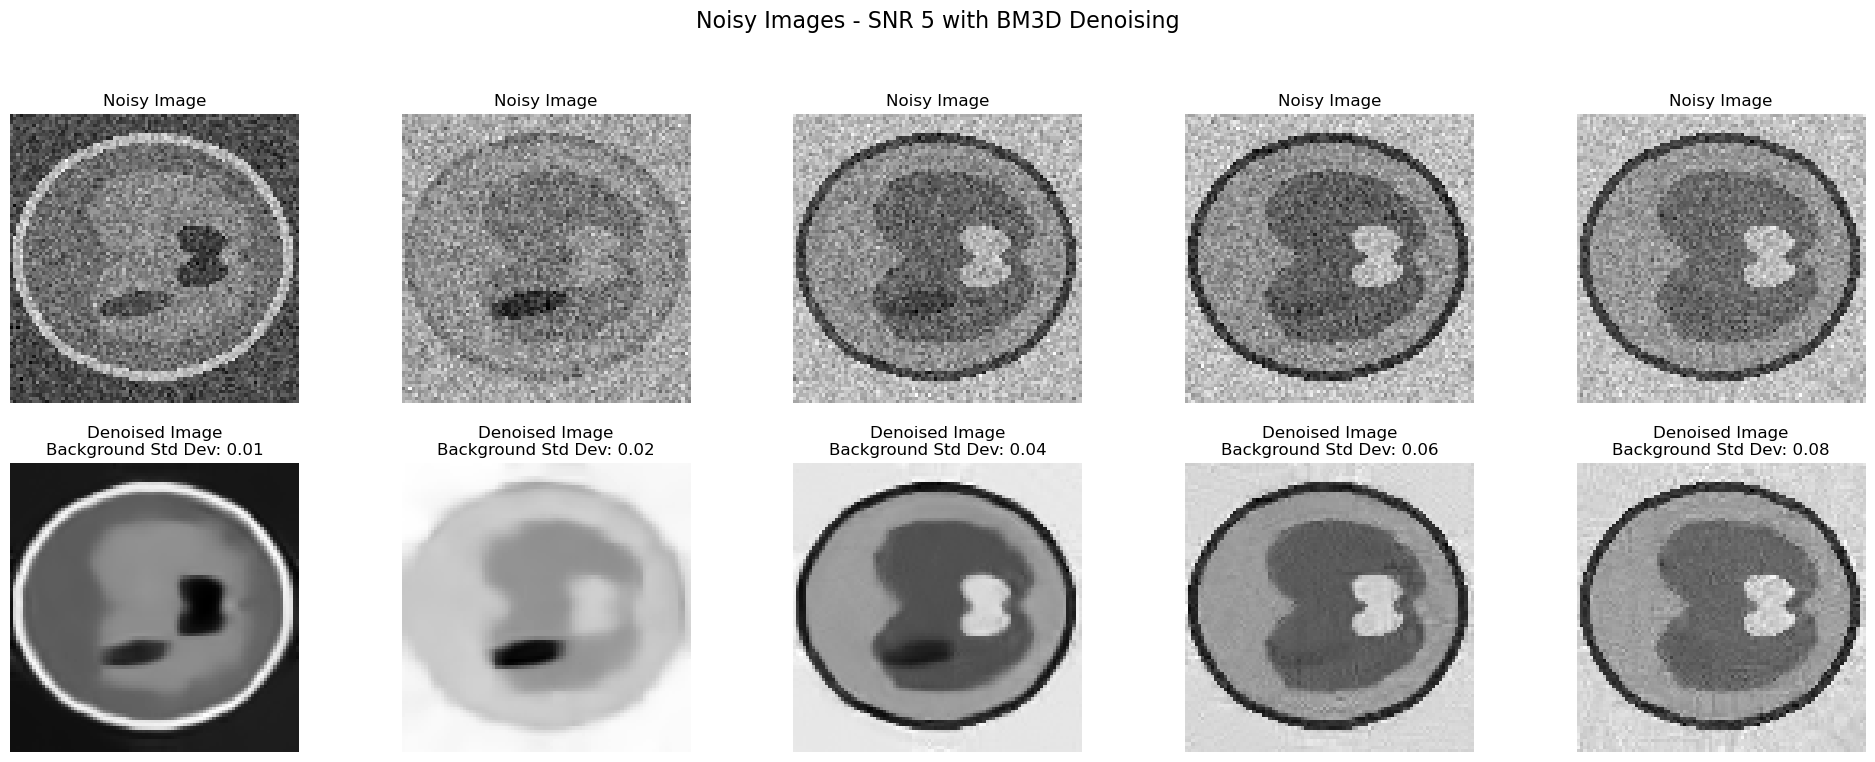

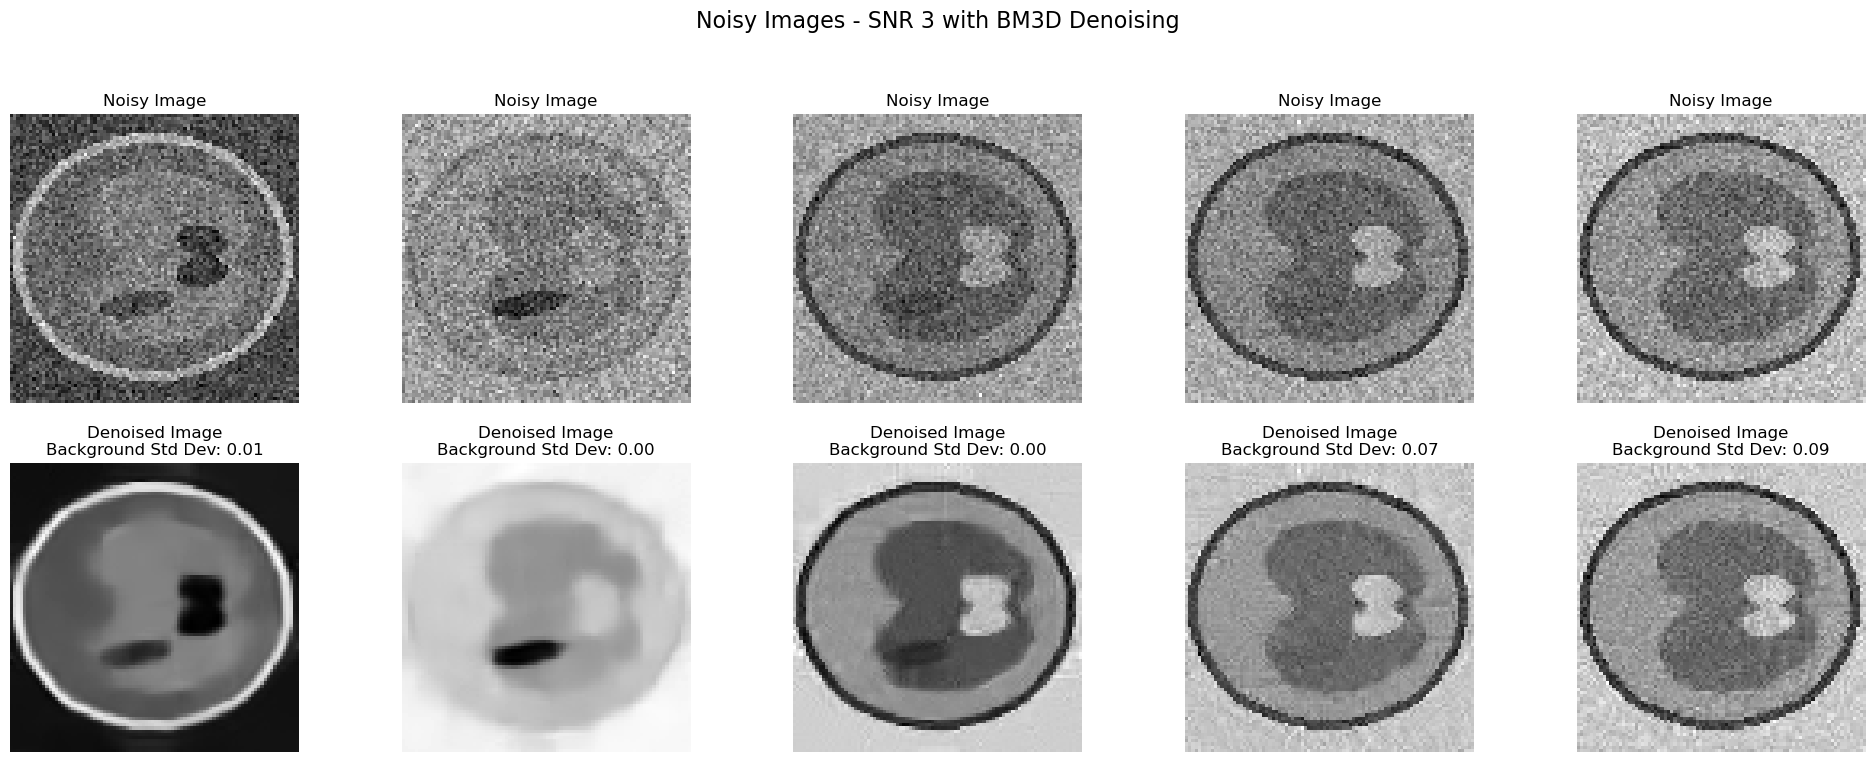

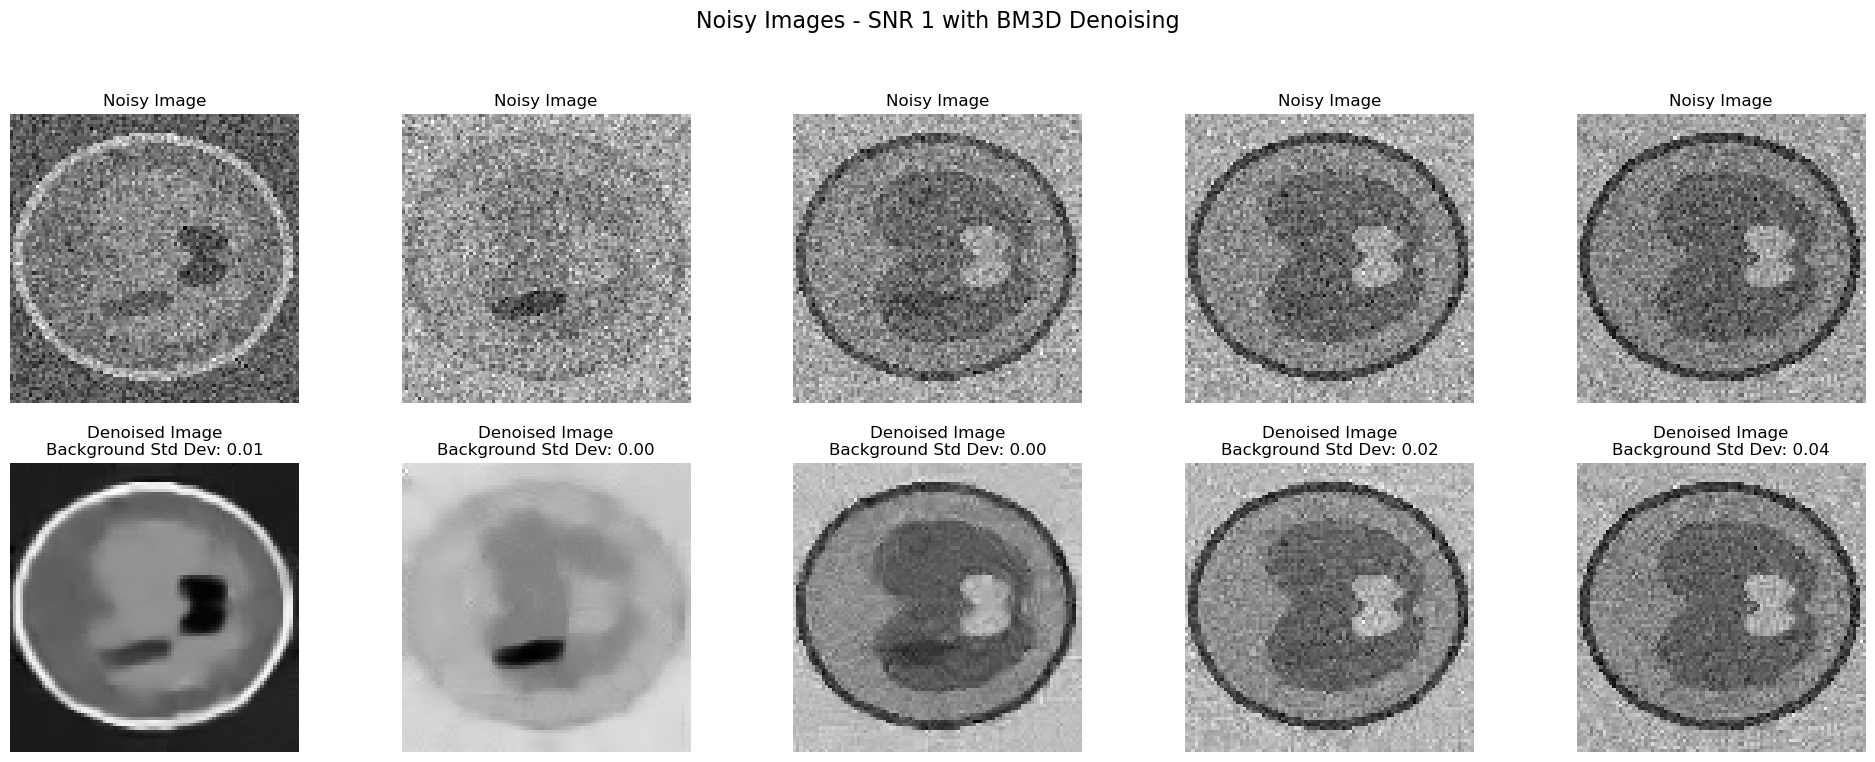

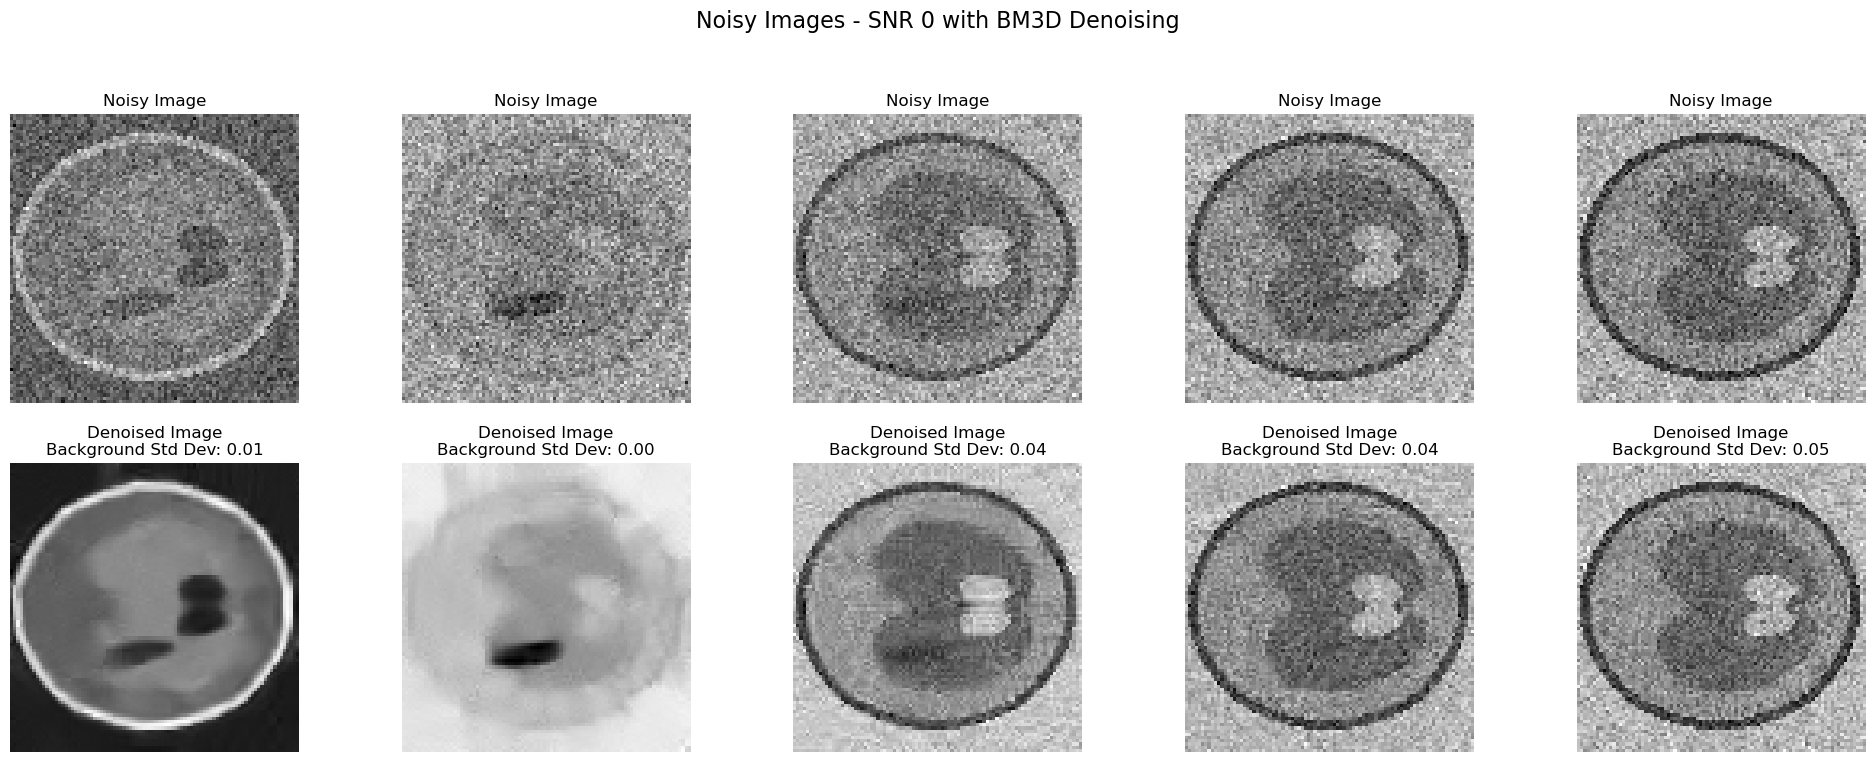

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import estimate_sigma
from skimage.color import rgb2gray  # For converting RGB images to grayscale if needed
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
import scipy.io
import bm3d

def create_background_mask(image_gray):
    thresh = threshold_otsu(image_gray)
    binary_image = image_gray <= thresh
    cleared_image = clear_border(binary_image)
    label_image = label(cleared_image)
    regions = regionprops(label_image)
    largest_area = 0
    background_label = 0
    for region in regions:
        if region.area > largest_area:
            largest_area = region.area
            background_label = region.label
    background_mask = label_image == background_label
    return background_mask

snrs = [10, 5, 3, 1, 0]

for snr in snrs:
    mat = scipy.io.loadmat(f'/Users/dolorious/Downloads/simulation-1/GroundTruth_gaussian_SNR{snr}.mat')
    
    noisy_image_data = mat['data_gaussian']
    plt.figure(figsize=(20, 8))

    conditions = noisy_image_data.shape[2]
    for j in range(conditions):
        noisy_image = noisy_image_data[:, :, j]

        # Convert to grayscale if it's a multichannel image
        if noisy_image.ndim == 3 and noisy_image.shape[2] == 3:
            noisy_image_gray = rgb2gray(noisy_image)
        else:
            noisy_image_gray = noisy_image

        sigma_est = np.mean(estimate_sigma(noisy_image, multichannel=True))
        background_mask = create_background_mask(noisy_image_gray)

        # Apply BM3D Denoising
        denoised_image = bm3d.bm3d(noisy_image_gray, sigma_psd=10/255, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

        # Calculate standard deviation of the background in the noisy image
        std_deviation_noisy = np.std(noisy_image_gray[background_mask])
        # For denoised image, let's also calculate it for comparison
        std_deviation_denoised = np.std(denoised_image[background_mask])

        plt.subplot(2, conditions, j + 1)
        plt.imshow(noisy_image_gray if noisy_image_gray.ndim == 2 else noisy_image, cmap='gray')
        plt.title('Noisy Image')
        plt.axis('off')

        plt.subplot(2, conditions, j + conditions + 1)
        plt.imshow(denoised_image, cmap='gray')
        plt.title(f'Denoised Image\nBackground Std Dev: {std_deviation_denoised:.2f}')
        plt.axis('off')

    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.85)
    plt.suptitle(f'Noisy Images - SNR {snr} with BM3D Denoising', fontsize=16, y=0.98)
    plt.show()


/var/folders/vl/tld4y4295dvbpfhgzk8mrvkc0000gn/T/ipykernel_87881/4176480413.py:44: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = np.mean(estimate_sigma(noisy_image_gray, multichannel=True))


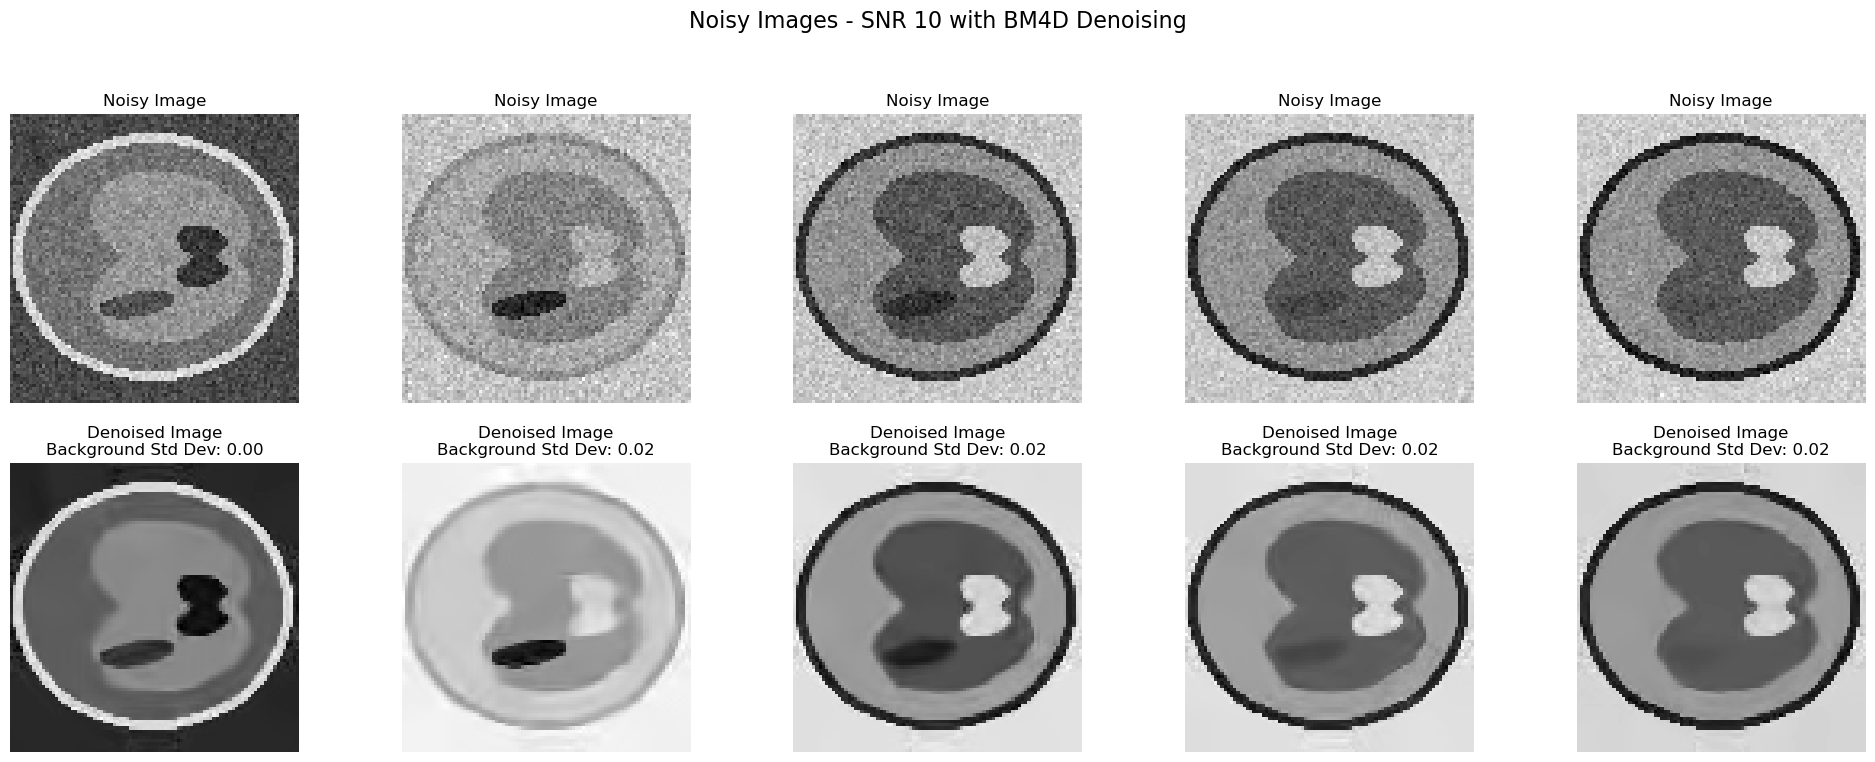

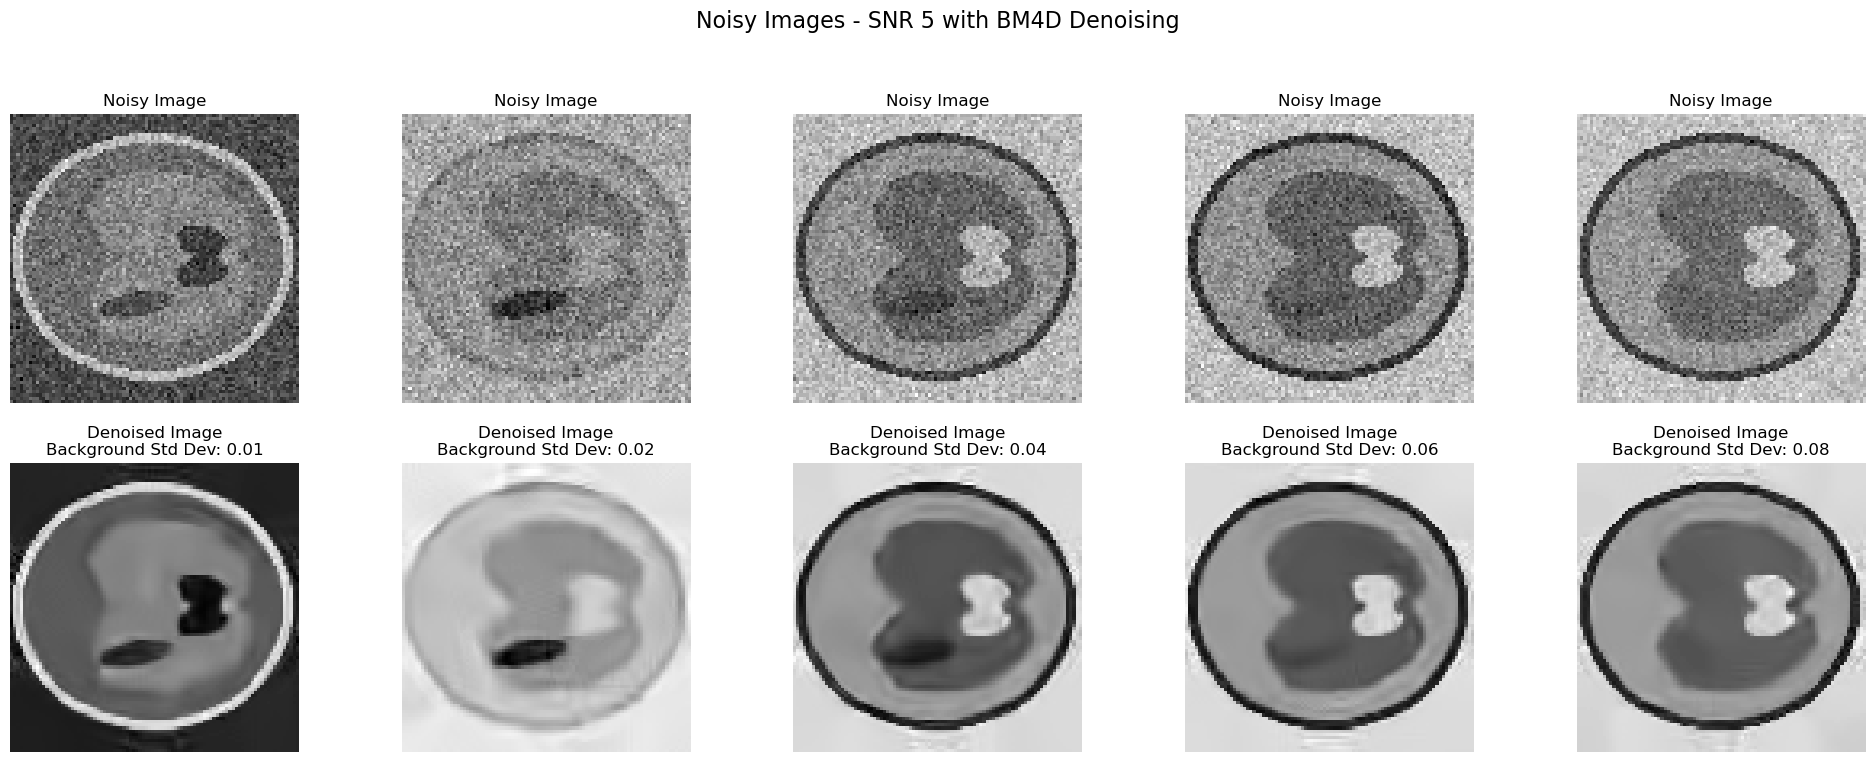

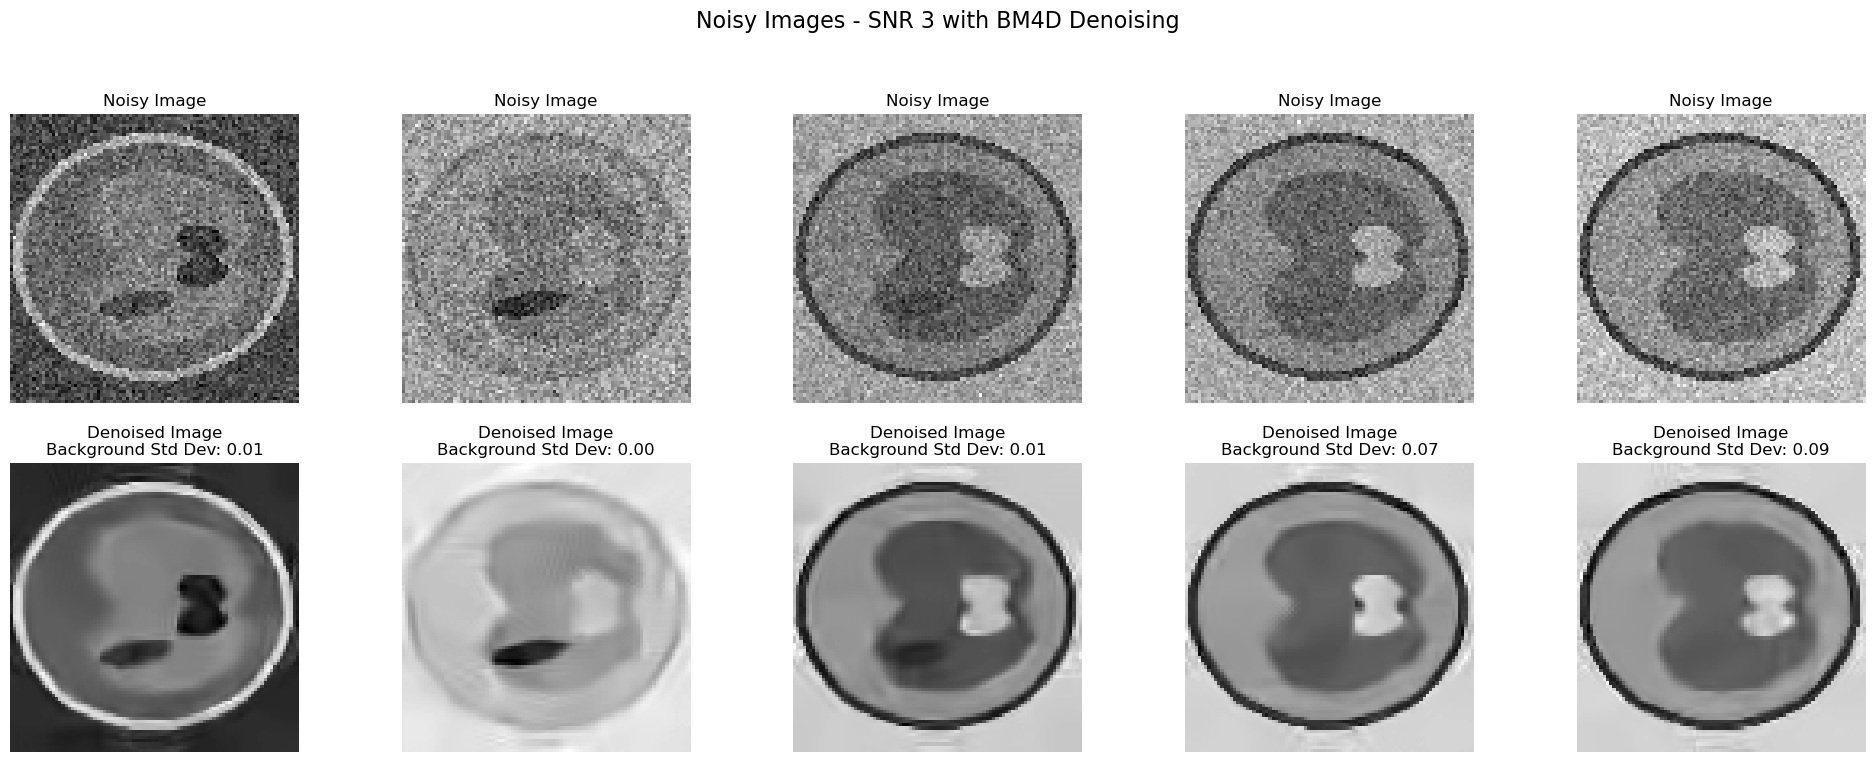

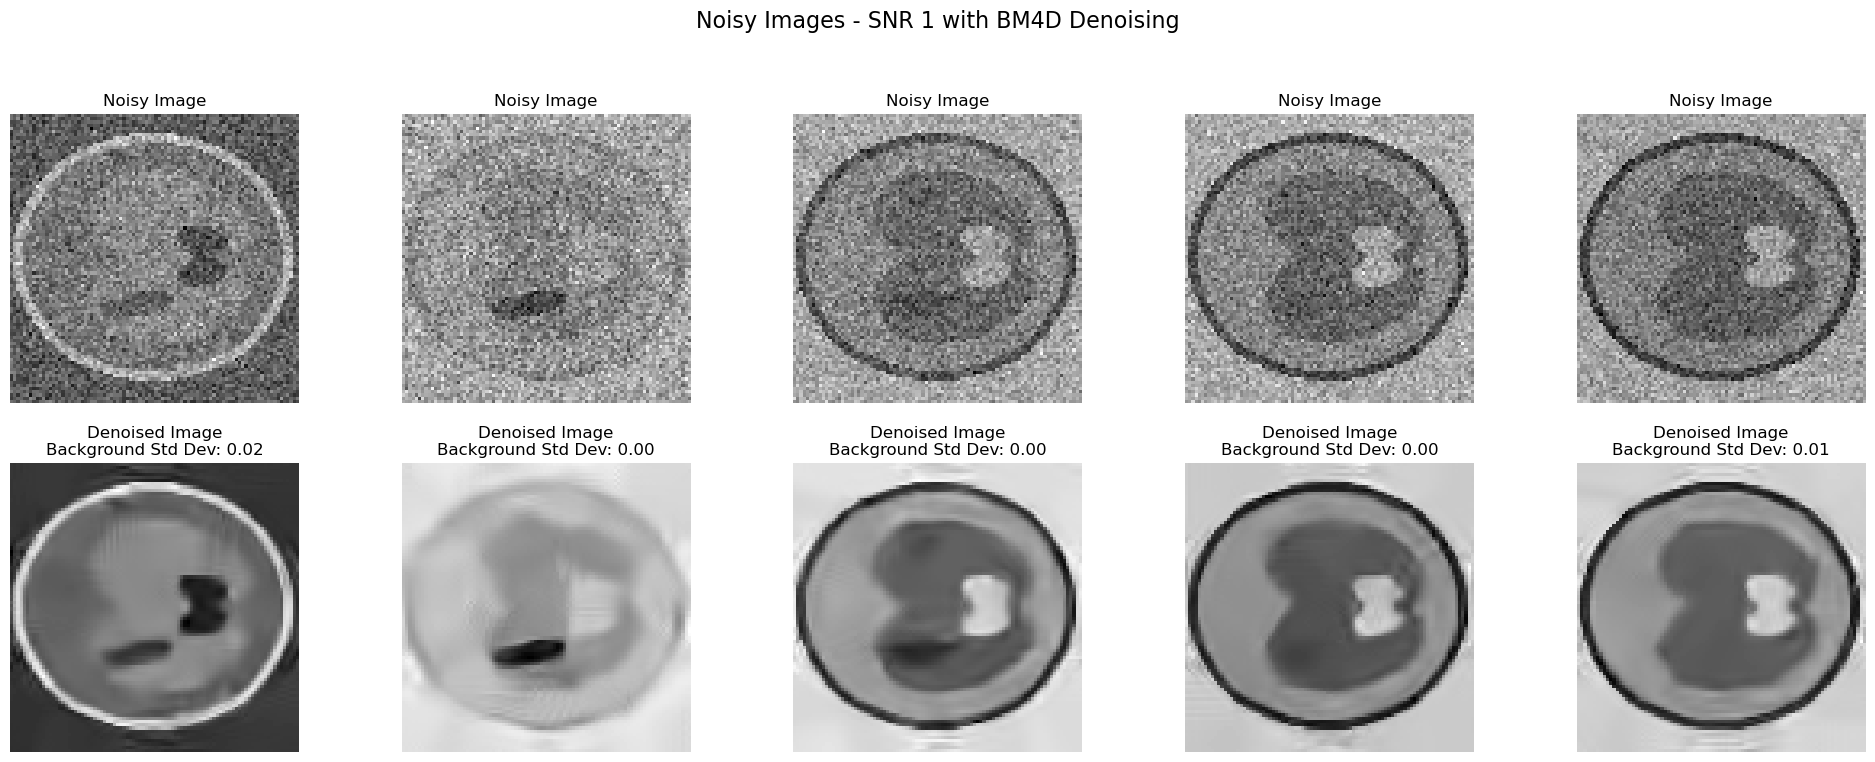

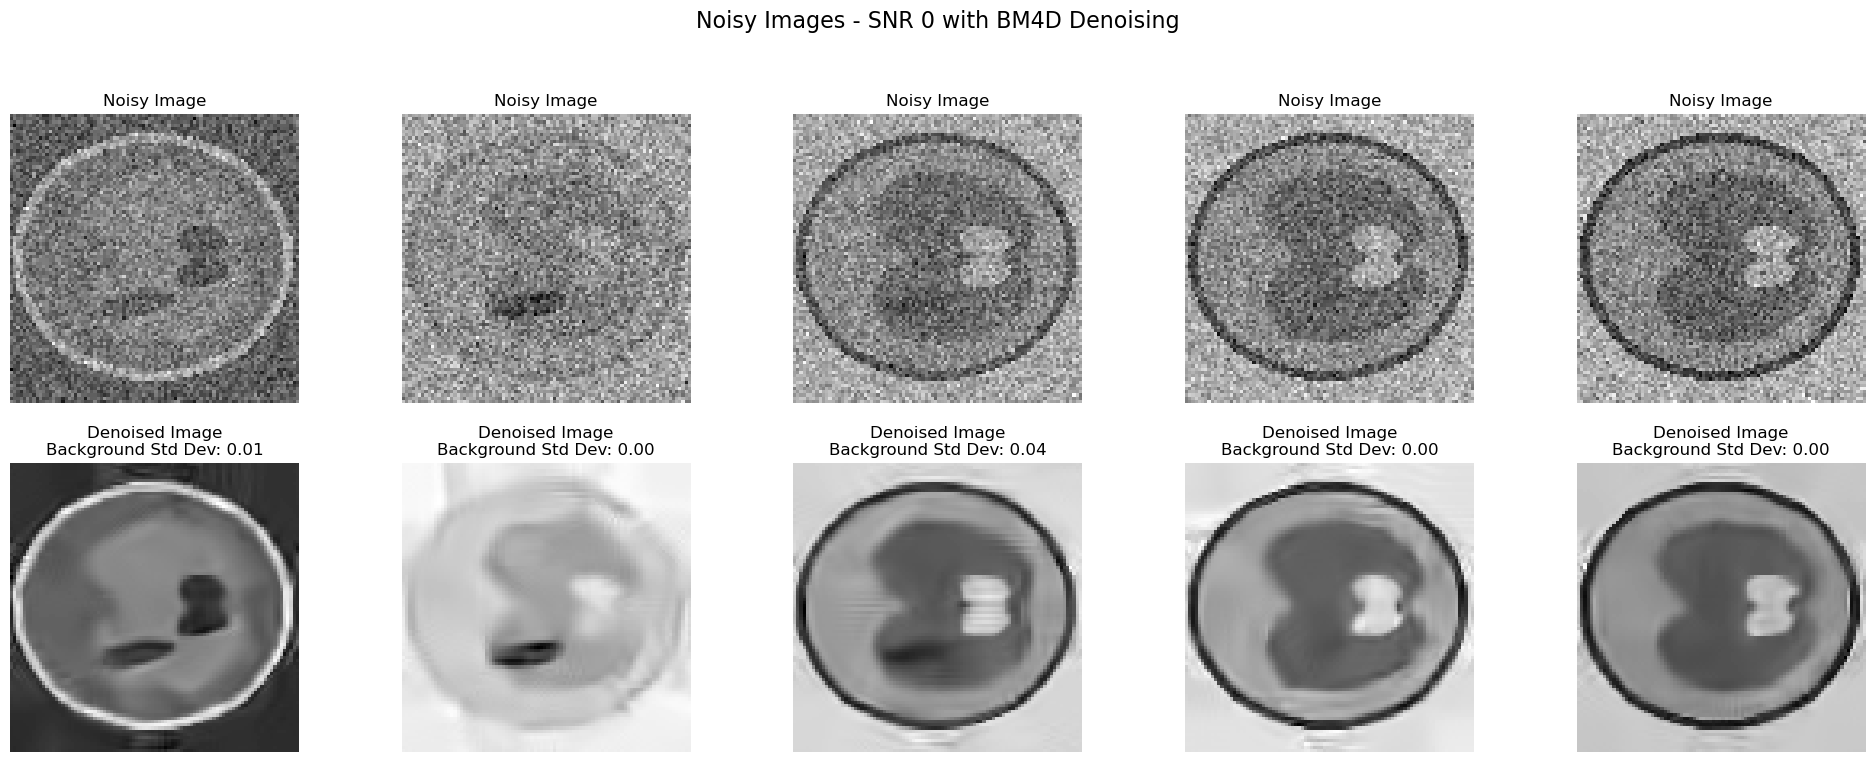

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import estimate_sigma
from skimage.color import rgb2gray  # For converting RGB images to grayscale if needed
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
import scipy.io
import bm4d

def create_background_mask(image_gray):
    thresh = threshold_otsu(image_gray)
    binary_image = image_gray <= thresh
    cleared_image = clear_border(binary_image)
    label_image = label(cleared_image)
    regions = regionprops(label_image)
    largest_area = 0
    background_label = 0
    for region in regions:
        if region.area > largest_area:
            largest_area = region.area
            background_label = region.label
    background_mask = label_image == background_label
    return background_mask

snrs = [10, 5, 3, 1, 0]

for snr in snrs:
    mat = scipy.io.loadmat(f'/Users/dolorious/Downloads/simulation-1/GroundTruth_gaussian_SNR{snr}.mat')
    
    noisy_image_data = mat['data_gaussian']
    plt.figure(figsize=(20, 8))

    conditions = noisy_image_data.shape[2]
    for j in range(conditions):
        noisy_image = noisy_image_data[:, :, j]

        # Convert to grayscale if it's a multichannel image
        if noisy_image.ndim == 3 and noisy_image.shape[2] == 3:
            noisy_image_gray = rgb2gray(noisy_image)
        else:
            noisy_image_gray = noisy_image

        sigma_est = np.mean(estimate_sigma(noisy_image_gray, multichannel=True))
        background_mask = create_background_mask(noisy_image_gray)

        # Apply BM3D Denoising
        denoised_image = bm4d.bm4d(noisy_image_gray, sigma_psd=sigma_est)

        # Calculate standard deviation of the background in the noisy image
        std_deviation_noisy = np.std(noisy_image_gray[background_mask])
        # For denoised image, let's also calculate it for comparison
        std_deviation_denoised = np.std(denoised_image[background_mask])

        plt.subplot(2, conditions, j + 1)
        plt.imshow(noisy_image_gray if noisy_image_gray.ndim == 2 else noisy_image, cmap='gray')
        plt.title('Noisy Image')
        plt.axis('off')

        plt.subplot(2, conditions, j + conditions + 1)
        plt.imshow(denoised_image, cmap='gray')
        plt.title(f'Denoised Image\nBackground Std Dev: {std_deviation_denoised:.2f}')
        plt.axis('off')

    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.85)
    plt.suptitle(f'Noisy Images - SNR {snr} with BM4D Denoising', fontsize=16, y=0.98)
    plt.show()


/var/folders/vl/tld4y4295dvbpfhgzk8mrvkc0000gn/T/ipykernel_87881/2607575003.py:44: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = np.mean(estimate_sigma(noisy_image, multichannel=True))


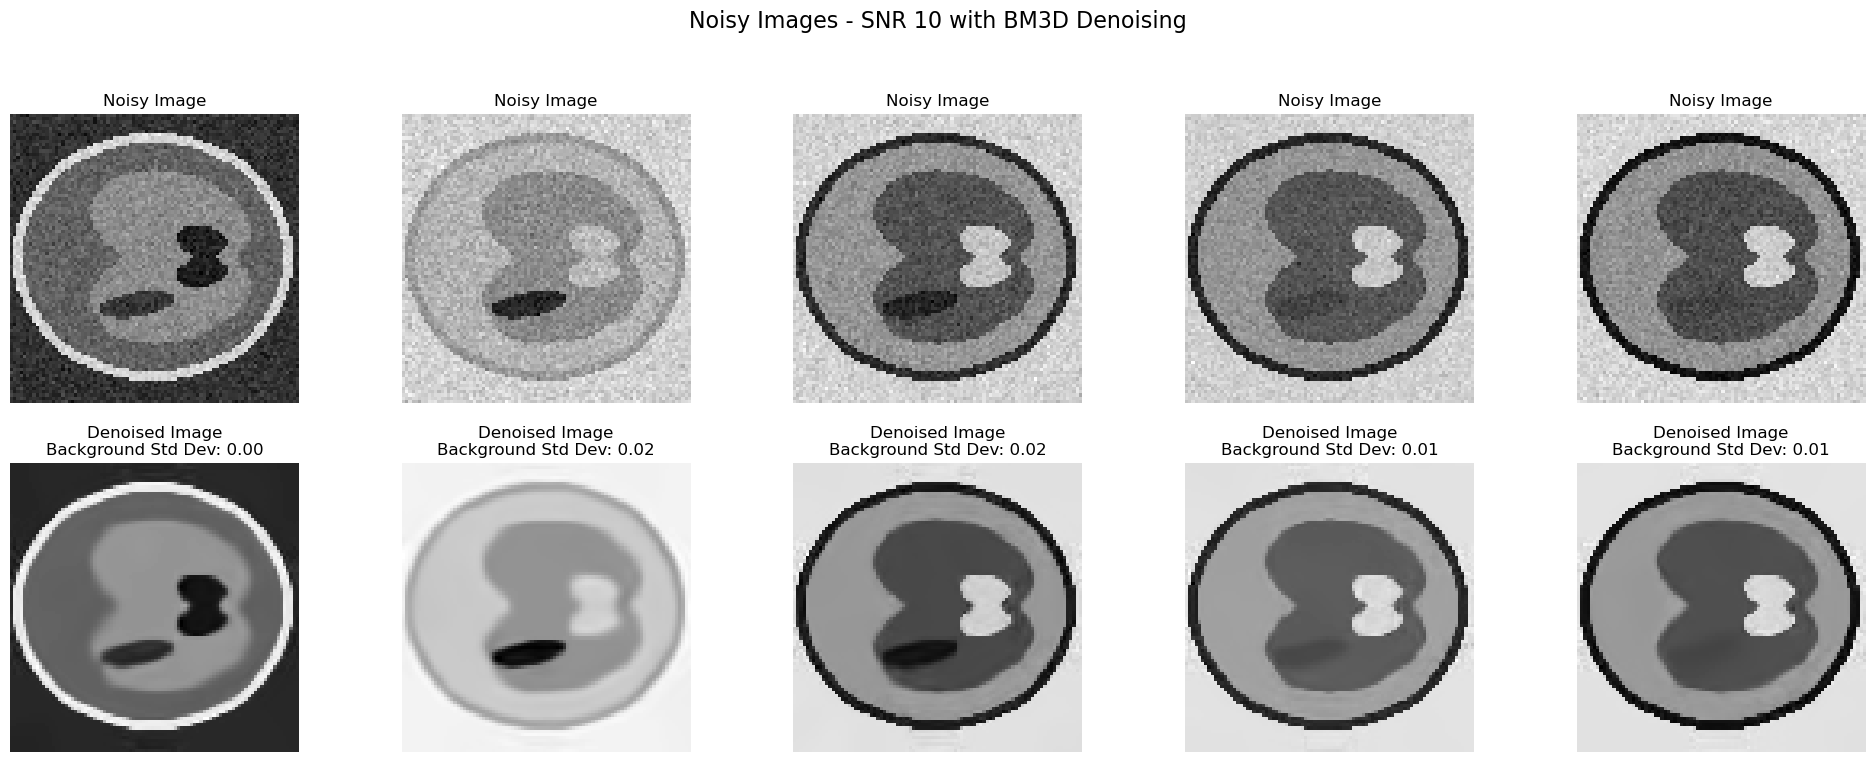

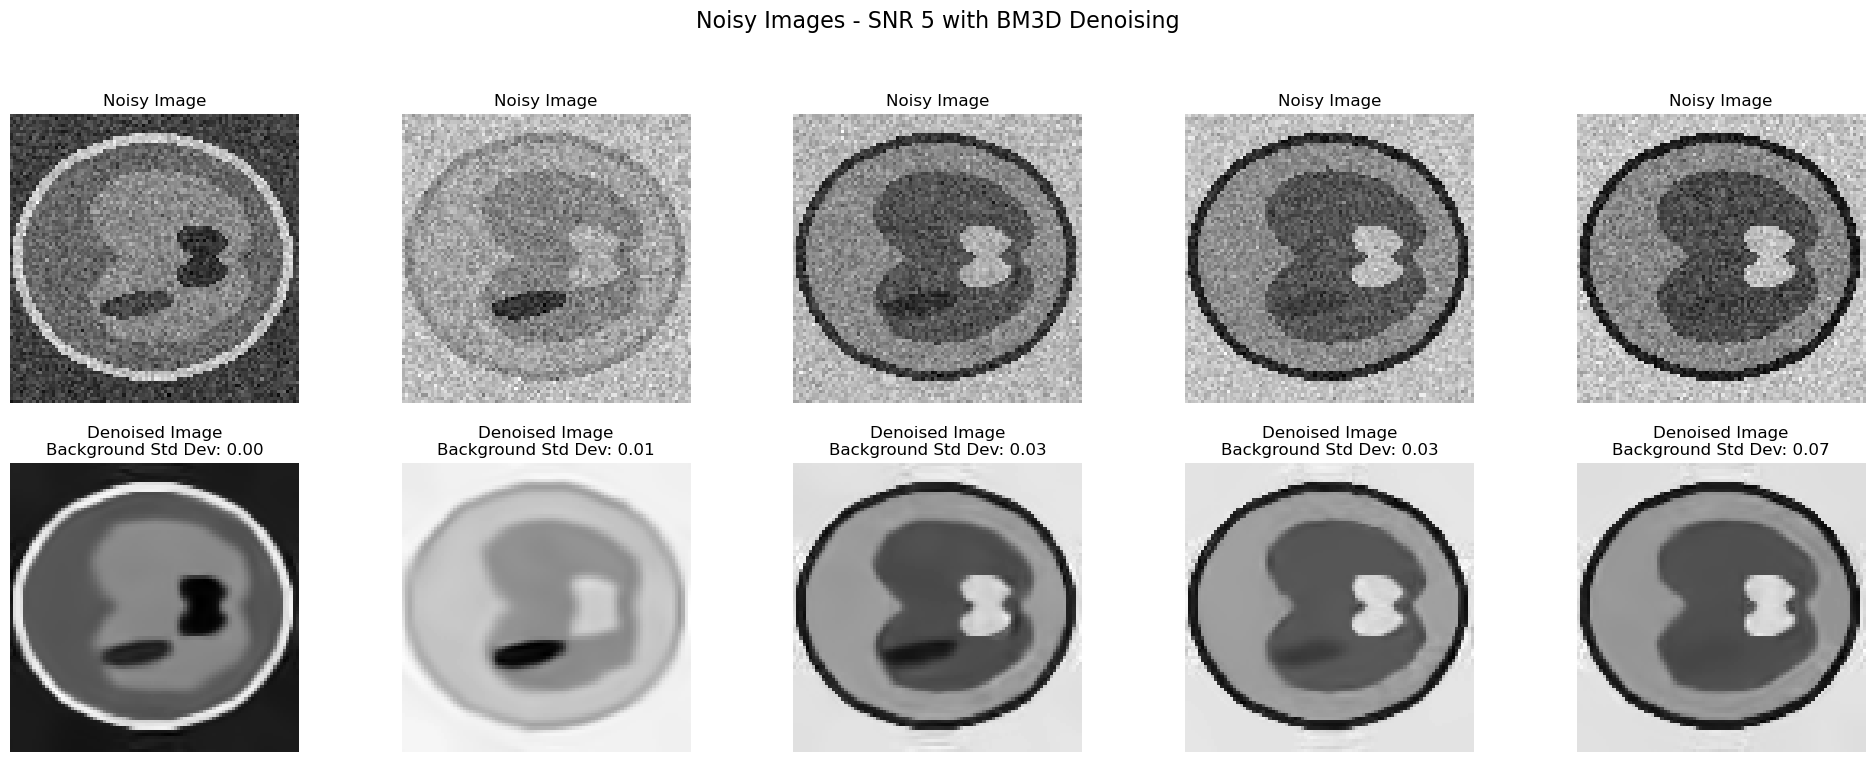

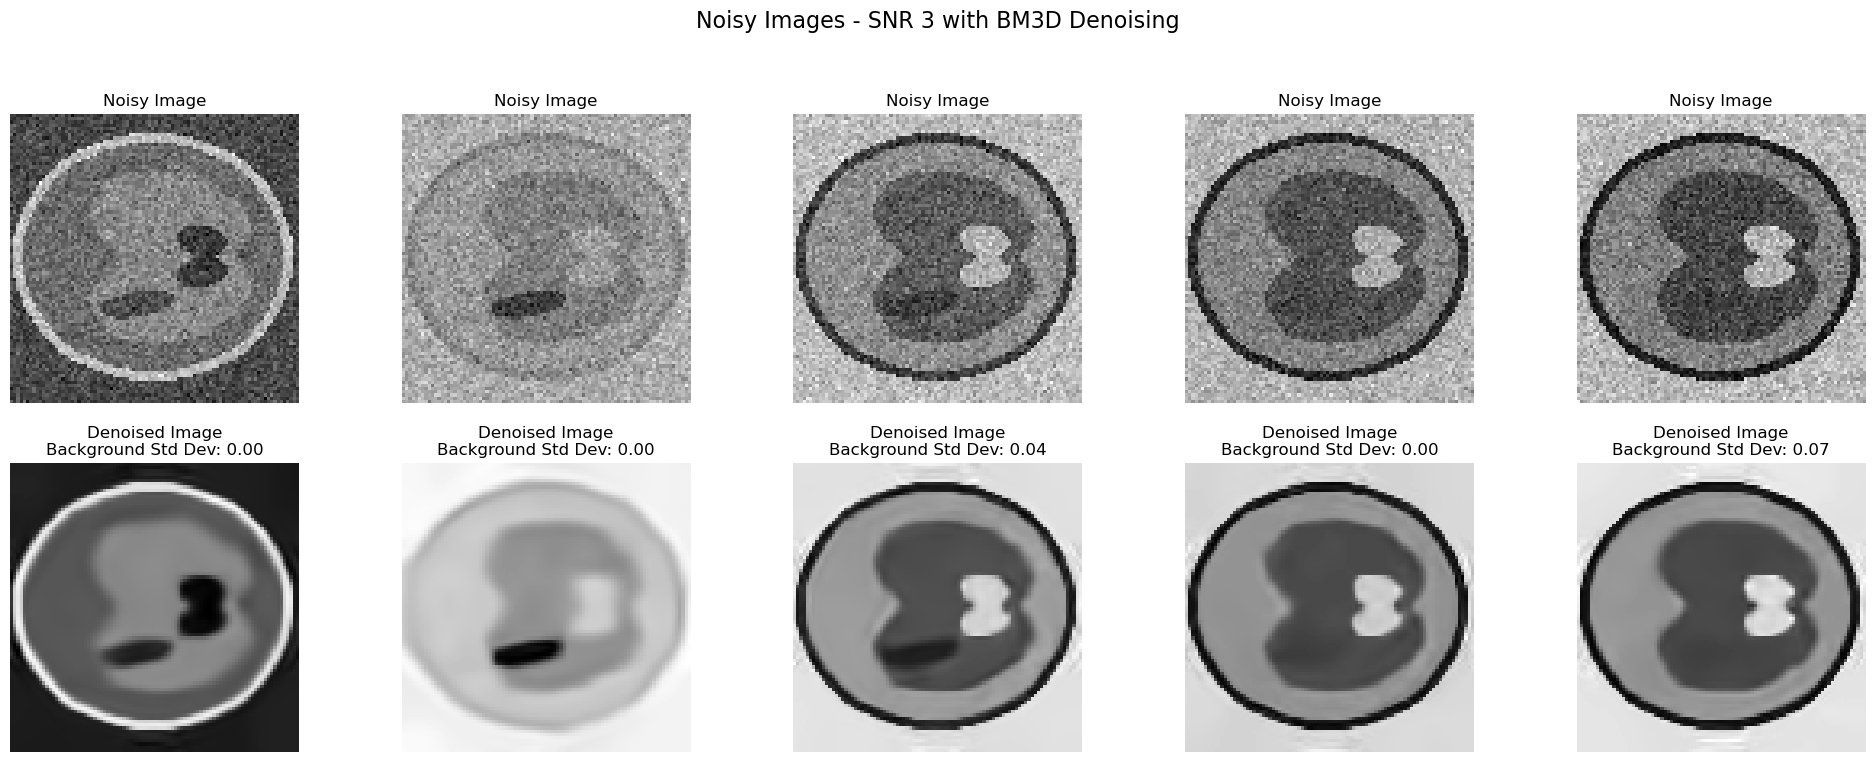

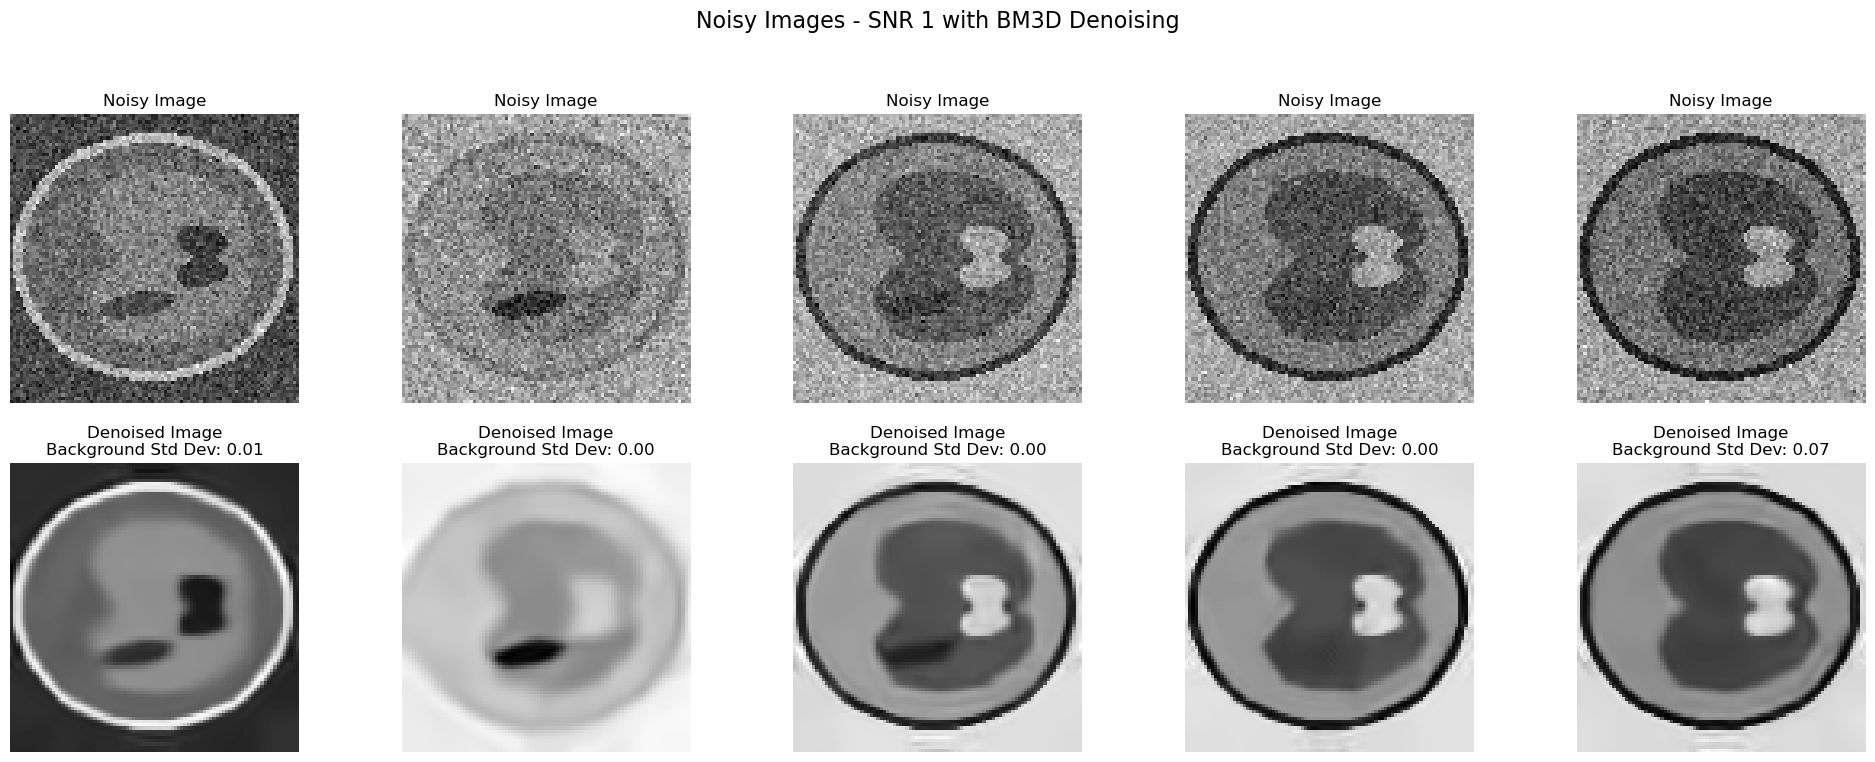

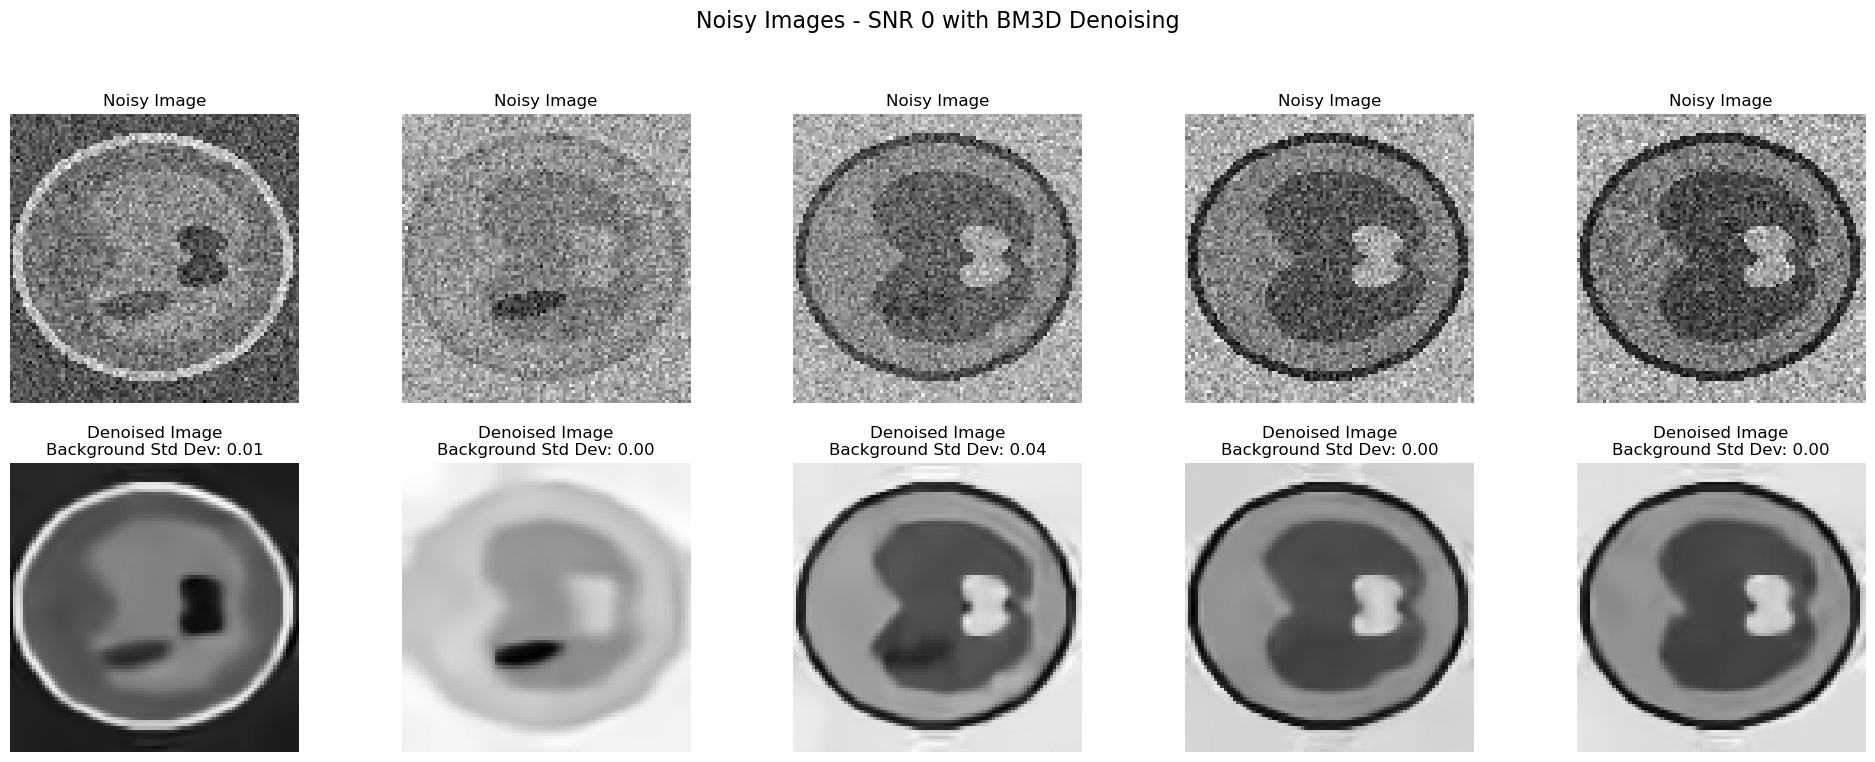

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import estimate_sigma
from skimage.color import rgb2gray  # For converting RGB images to grayscale if needed
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
import scipy.io
import bm3d

def create_background_mask(image_gray):
    thresh = threshold_otsu(image_gray)
    binary_image = image_gray <= thresh
    cleared_image = clear_border(binary_image)
    label_image = label(cleared_image)
    regions = regionprops(label_image)
    largest_area = 0
    background_label = 0
    for region in regions:
        if region.area > largest_area:
            largest_area = region.area
            background_label = region.label
    background_mask = label_image == background_label
    return background_mask

snrs = [10, 5, 3, 1, 0]

for snr in snrs:
    mat = scipy.io.loadmat(f'/Users/dolorious/Downloads/simulation-1/GroundTruth_rician_SNR{snr}.mat')
    
    noisy_image_data = mat['data_rician']
    plt.figure(figsize=(20, 8))

    conditions = noisy_image_data.shape[2]
    for j in range(conditions):
        noisy_image = noisy_image_data[:, :, j]

        # Convert to grayscale if it's a multichannel image
        if noisy_image.ndim == 3 and noisy_image.shape[2] == 3:
            noisy_image_gray = rgb2gray(noisy_image)
        else:
            noisy_image_gray = noisy_image

        sigma_est = np.mean(estimate_sigma(noisy_image, multichannel=True))
        background_mask = create_background_mask(noisy_image_gray)

        # Apply BM3D Denoising
        denoised_image = bm3d.bm3d(noisy_image_gray, sigma_psd=sigma_est)

        # Calculate standard deviation of the background in the noisy image
        std_deviation_noisy = np.std(noisy_image_gray[background_mask])
        # For denoised image, let's also calculate it for comparison
        std_deviation_denoised = np.std(denoised_image[background_mask])

        plt.subplot(2, conditions, j + 1)
        plt.imshow(noisy_image_gray if noisy_image_gray.ndim == 2 else noisy_image, cmap='gray')
        plt.title('Noisy Image')
        plt.axis('off')

        plt.subplot(2, conditions, j + conditions + 1)
        plt.imshow(denoised_image, cmap='gray')
        plt.title(f'Denoised Image\nBackground Std Dev: {std_deviation_denoised:.2f}')
        plt.axis('off')

    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.85)
    plt.suptitle(f'Noisy Images - SNR {snr} with BM3D Denoising', fontsize=16, y=0.98)
    plt.show()
